# Notebook 01 - Data Understanding & Visualization

**Objective:** Thoroughly explore and visualize all **three raw datasets** - `movies_metadata.csv`, `credits.csv`, and `keywords.csv` - to understand their structure, quality, distributions, and relationships. This lays the foundation for preprocessing, feature engineering, and modeling.

---

**Datasets:**
| Dataset | Rows | Columns | Key Fields |
|---|---|---|---|
| `movies_metadata.csv` | ~45K | 24 | budget, revenue, genres, popularity, vote_average, etc. |
| `credits.csv` | ~45K | 3 | cast (JSON), crew (JSON), id |
| `keywords.csv` | ~46K | 2 | keywords (JSON), id |

**Notebook Sections:**
1. Setup & Load
2. Movies Metadata - Structure & Quality
3. Movies Metadata - Distributions & Visualizations
4. Credits - Structure & Quality
5. Credits - Distributions & Visualizations
6. Keywords - Structure & Quality
7. Keywords - Distributions & Visualizations
8. Cross-Dataset Alignment & Join Analysis
9. Key Findings & Implications for Feature Engineering

In [13]:
# Section 1: Setup & Load
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import json
from ast import literal_eval
from collections import Counter
import warnings
warnings.filterwarnings('ignore')

# Display settings
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', 100)
pd.set_option('display.max_colwidth', 80)
sns.set_style('whitegrid')
plt.rcParams['figure.figsize'] = (14, 6)
plt.rcParams['font.size'] = 11

# Utility: safe JSON parser for stringified list-of-dicts columns
def parse_json_column(val):
    """Parse JSON-like strings; returns [] on failure."""
    if pd.isna(val):
        return []
    if isinstance(val, str):
        try:
            return json.loads(val)
        except Exception:
            try:
                parsed = literal_eval(val)
                return parsed if isinstance(parsed, list) else []
            except Exception:
                return []
    return val if isinstance(val, list) else []

print('Libraries loaded')

Libraries loaded


In [14]:
# Load all three raw datasets
movies_df = pd.read_csv('../data/raw/movies_metadata.csv', low_memory=False)
credits_df = pd.read_csv('../data/raw/credits.csv')
keywords_df = pd.read_csv('../data/raw/keywords.csv')

print(f'movies_metadata : {movies_df.shape[0]:,} rows x {movies_df.shape[1]} columns')
print(f'credits         : {credits_df.shape[0]:,} rows x {credits_df.shape[1]} columns')
print(f'keywords        : {keywords_df.shape[0]:,} rows x {keywords_df.shape[1]} columns')

movies_metadata : 45,466 rows x 24 columns
credits         : 45,476 rows x 3 columns
keywords        : 46,419 rows x 2 columns


---
## 2. Movies Metadata - Structure & Quality

In [15]:
# 2.1  Column types & head
print('=' * 90)
print('MOVIES METADATA - COLUMN TYPES')
print('=' * 90)
print(movies_df.dtypes.to_string())
print('\n--- First 3 rows ---')
movies_df.head(3)

MOVIES METADATA - COLUMN TYPES
adult                        str
belongs_to_collection        str
budget                       str
genres                       str
homepage                     str
id                           str
imdb_id                      str
original_language            str
original_title               str
overview                     str
popularity                   str
poster_path                  str
production_companies         str
production_countries         str
release_date                 str
revenue                  float64
runtime                  float64
spoken_languages             str
status                       str
tagline                      str
title                        str
video                     object
vote_average             float64
vote_count               float64

--- First 3 rows ---


,adult,belongs_to_collection,budget,genres,homepage,id,imdb_id,original_language,original_title,overview,popularity,poster_path,production_companies,production_countries,release_date,revenue,runtime,spoken_languages,status,tagline,title,video,vote_average,vote_count
0,False,"{'id': 10194, 'name': 'Toy Story Collection', 'poster_path': '/7G9915LfUQ2lV...",30000000,"[{'id': 16, 'name': 'Animation'}, {'id': 35, 'name': 'Comedy'}, {'id': 10751...",http://toystory.disney.com/toy-story,862,tt0114709,en,Toy Story,"Led by Woody, Andy's toys live happily in his room until Andy's birthday bri...",21.946943,/rhIRbceoE9lR4veEXuwCC2wARtG.jpg,"[{'name': 'Pixar Animation Studios', 'id': 3}]","[{'iso_3166_1': 'US', 'name': 'United States of America'}]",1995-10-30,373554033.0,81.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,NaN,Toy Story,False,7.7,5415.0
1,False,NaN,65000000,"[{'id': 12, 'name': 'Adventure'}, {'id': 14, 'name': 'Fantasy'}, {'id': 1075...",NaN,8844,tt0113497,en,Jumanji,When siblings Judy and Peter discover an enchanted board game that opens the...,17.015539,/vzmL6fP7aPKNKPRTFnZmiUfciyV.jpg,"[{'name': 'TriStar Pictures', 'id': 559}, {'name': 'Teitler Film', 'id': 255...","[{'iso_3166_1': 'US', 'name': 'United States of America'}]",1995-12-15,262797249.0,104.0,"[{'iso_639_1': 'en', 'name': 'English'}, {'iso_639_1': 'fr', 'name': 'França...",Released,Roll the dice and unleash the excitement!,Jumanji,False,6.9,2413.0
2,False,"{'id': 119050, 'name': 'Grumpy Old Men Collection', 'poster_path': '/nLvUdqg...",0,"[{'id': 10749, 'name': 'Romance'}, {'id': 35, 'name': 'Comedy'}]",NaN,15602,tt0113228,en,Grumpier Old Men,A family wedding reignites the ancient feud between next-door neighbors and ...,11.7129,/6ksm1sjKMFLbO7UY2i6G1ju9SML.jpg,"[{'name': 'Warner Bros.', 'id': 6194}, {'name': 'Lancaster Gate', 'id': 19464}]","[{'iso_3166_1': 'US', 'name': 'United States of America'}]",1995-12-22,0.0,101.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Still Yelling. Still Fighting. Still Ready for Love.,Grumpier Old Men,False,6.5,92.0


Missing values (columns with any missing):
                       count    pct
belongs_to_collection  40972  90.12
homepage               37684  82.88
tagline                25054  55.10
overview                 954   2.10
poster_path              386   0.85
runtime                  263   0.58
release_date              87   0.19
status                    87   0.19
imdb_id                   17   0.04
original_language         11   0.02
popularity                 5   0.01
revenue                    6   0.01
production_countries       3   0.01
production_companies       3   0.01
spoken_languages           6   0.01
title                      6   0.01
video                      6   0.01
vote_average               6   0.01
vote_count                 6   0.01


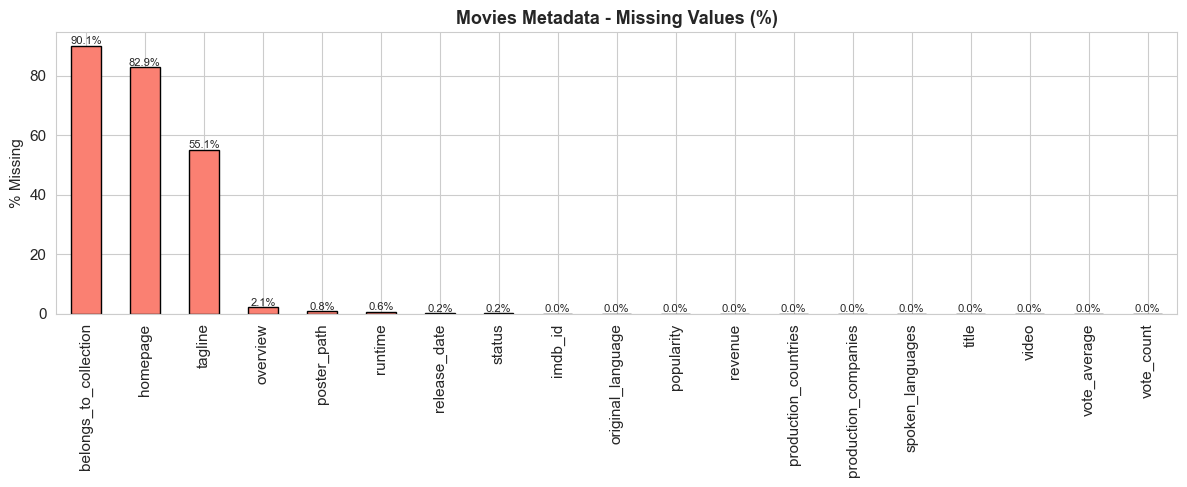

In [16]:
# 2.2  Missing values analysis
missing = movies_df.isnull().sum()
missing_pct = (missing / len(movies_df) * 100).round(2)
missing_info = (
    pd.DataFrame({'count': missing, 'pct': missing_pct})
    .query('count > 0')
    .sort_values('pct', ascending=False)
)
print('Missing values (columns with any missing):')
print(missing_info.to_string())

# Visualize
fig, ax = plt.subplots(figsize=(12, 5))
missing_info['pct'].plot(kind='bar', color='salmon', edgecolor='black', ax=ax)
ax.set_title('Movies Metadata - Missing Values (%)', fontsize=13, fontweight='bold')
ax.set_ylabel('% Missing')
ax.set_xlabel('')
for i, v in enumerate(missing_info['pct']):
    ax.text(i, v + 0.5, f'{v:.1f}%', ha='center', fontsize=8)
plt.tight_layout()
plt.show()

In [17]:
# 2.3  ID column quality - crucial for merging with credits & keywords
print("--- movies_metadata 'id' column ---")
print(f'  dtype       : {movies_df["id"].dtype}')
print(f'  nunique     : {movies_df["id"].nunique():,}')
print(f'  duplicates  : {movies_df["id"].duplicated().sum()}')

# Detect non-numeric IDs (data corruption rows)
non_numeric_ids = movies_df[~movies_df['id'].astype(str).str.match(r'^\d+$')]
print(f'  non-numeric : {len(non_numeric_ids)}  <-- corrupted rows')
if len(non_numeric_ids) > 0:
    print('\n  Corrupted rows (showing id, title, budget):')
    display(non_numeric_ids[['id', 'title', 'budget']].head(10))

--- movies_metadata 'id' column ---
  dtype       : str
  nunique     : 45,436
  duplicates  : 30
  non-numeric : 3  <-- corrupted rows

  Corrupted rows (showing id, title, budget):


,id,title,budget
19730,1997-08-20,NaN,/ff9qCepilowshEtG2GYWwzt2bs4.jpg
29503,2012-09-29,NaN,/zV8bHuSL6WXoD6FWogP9j4x80bL.jpg
35587,2014-01-01,NaN,/zaSf5OG7V8X8gqFvly88zDdRm46.jpg


In [18]:
# 2.4  Type issues: budget is stored as string, needs conversion
print('--- Type Issues ---')
print(f'  budget dtype  : {movies_df["budget"].dtype}  (should be numeric)')
print(f'  popularity    : {movies_df["popularity"].dtype}  (should be numeric)')
print(f'  revenue dtype : {movies_df["revenue"].dtype}')
print(f'  runtime dtype : {movies_df["runtime"].dtype}')

# Check budget: how many are non-numeric?
budget_non_numeric = movies_df[pd.to_numeric(movies_df['budget'], errors='coerce').isna() & movies_df['budget'].notna()]
print(f'\n  Non-numeric budget values: {len(budget_non_numeric)}')
if len(budget_non_numeric) > 0:
    print('  Examples:', budget_non_numeric['budget'].head(5).tolist())

--- Type Issues ---
  budget dtype  : str  (should be numeric)
  popularity    : str  (should be numeric)
  revenue dtype : float64
  runtime dtype : float64

  Non-numeric budget values: 3
  Examples: ['/ff9qCepilowshEtG2GYWwzt2bs4.jpg', '/zV8bHuSL6WXoD6FWogP9j4x80bL.jpg', '/zaSf5OG7V8X8gqFvly88zDdRm46.jpg']


In [19]:
# 2.5  Duplicate analysis
print('--- Duplicate Analysis ---')
print(f'  Exact duplicate rows    : {movies_df.duplicated().sum()}')
print(f'  Duplicate IDs           : {movies_df["id"].duplicated().sum()}')
print(f'  Duplicate titles        : {movies_df["title"].duplicated().sum()}')

# Same title can be legitimate (remakes), but same id is not
dup_ids = movies_df[movies_df['id'].duplicated(keep=False)].sort_values('id')
if len(dup_ids) > 0:
    print(f'\n  Rows sharing duplicate IDs: {len(dup_ids)}')
    display(dup_ids[['id', 'title', 'release_date', 'budget', 'revenue']].head(10))

--- Duplicate Analysis ---
  Exact duplicate rows    : 17
  Duplicate IDs           : 30
  Duplicate titles        : 3188

  Rows sharing duplicate IDs: 59


,id,title,release_date,budget,revenue
676,105045,The Promise,1995-02-16,0,0.0
1465,105045,The Promise,1995-02-16,0,0.0
44821,10991,Pokémon: Spell of the Unknown,2000-07-08,16000000,68411275.0
4114,10991,Pokémon: Spell of the Unknown,2000-07-08,16000000,68411275.0
5710,109962,Rich and Famous,1981-09-23,0,0.0
20899,109962,Rich and Famous,1981-09-23,0,0.0
23534,110428,Camille Claudel 1915,2013-03-13,3512454,115860.0
4356,110428,Camille Claudel 1915,2013-03-13,3512454,115860.0
24844,11115,Deal,2008-01-29,0,0.0
14012,11115,Deal,2008-01-29,0,0.0


In [20]:
# 2.6  Categorical flags: adult, video, status
print("--- 'adult' column ---")
print(movies_df['adult'].value_counts())
print("\n--- 'video' column ---")
print(movies_df['video'].value_counts())
print("\n--- 'status' column ---")
print(movies_df['status'].value_counts())

--- 'adult' column ---
adult
False                                                                                                                             45454
True                                                                                                                                  9
 - Written by Ørnås                                                                                                                   1
 Rune Balot goes to a casino connected to the October corporation to try to wrap up her case once and for all.                        1
 Avalanche Sharks tells the story of a bikini contest that turns into a horrifying affair when it is hit by a shark avalanche.        1
Name: count, dtype: int64

--- 'video' column ---
video
False    45367
True        93
Name: count, dtype: int64

--- 'status' column ---
status
Released           45014
Rumored              230
Post Production       98
In Production         20
Planned               15
Canceled              

---
## 3. Movies Metadata - Distributions & Visualizations

In [21]:
# Prepare numeric columns for visualization (convert budget & popularity)
movies_viz = movies_df.copy()
movies_viz['budget'] = pd.to_numeric(movies_viz['budget'], errors='coerce')
movies_viz['popularity'] = pd.to_numeric(movies_viz['popularity'], errors='coerce')

# Parse release_date
movies_viz['release_date'] = pd.to_datetime(movies_viz['release_date'], errors='coerce')
movies_viz['release_year'] = movies_viz['release_date'].dt.year

numeric_cols = ['budget', 'revenue', 'runtime', 'popularity', 'vote_average', 'vote_count']
print('Numeric summary (all values including zeros):')
movies_viz[numeric_cols].describe().round(2)

Numeric summary (all values including zeros):


,budget,revenue,runtime,popularity,vote_average,vote_count
count,4.546300e+04,4.546000e+04,45203.00,45460.00,45460.00,45460.00
mean,4.224579e+06,1.120935e+07,94.13,2.92,5.62,109.90
std,1.742413e+07,6.433225e+07,38.41,6.01,1.92,491.31
min,0.000000e+00,0.000000e+00,0.00,0.00,0.00,0.00
25%,0.000000e+00,0.000000e+00,85.00,0.39,5.00,3.00
50%,0.000000e+00,0.000000e+00,95.00,1.13,6.00,10.00
75%,0.000000e+00,0.000000e+00,107.00,3.68,6.80,34.00
max,3.800000e+08,2.787965e+09,1256.00,547.49,10.00,14075.00


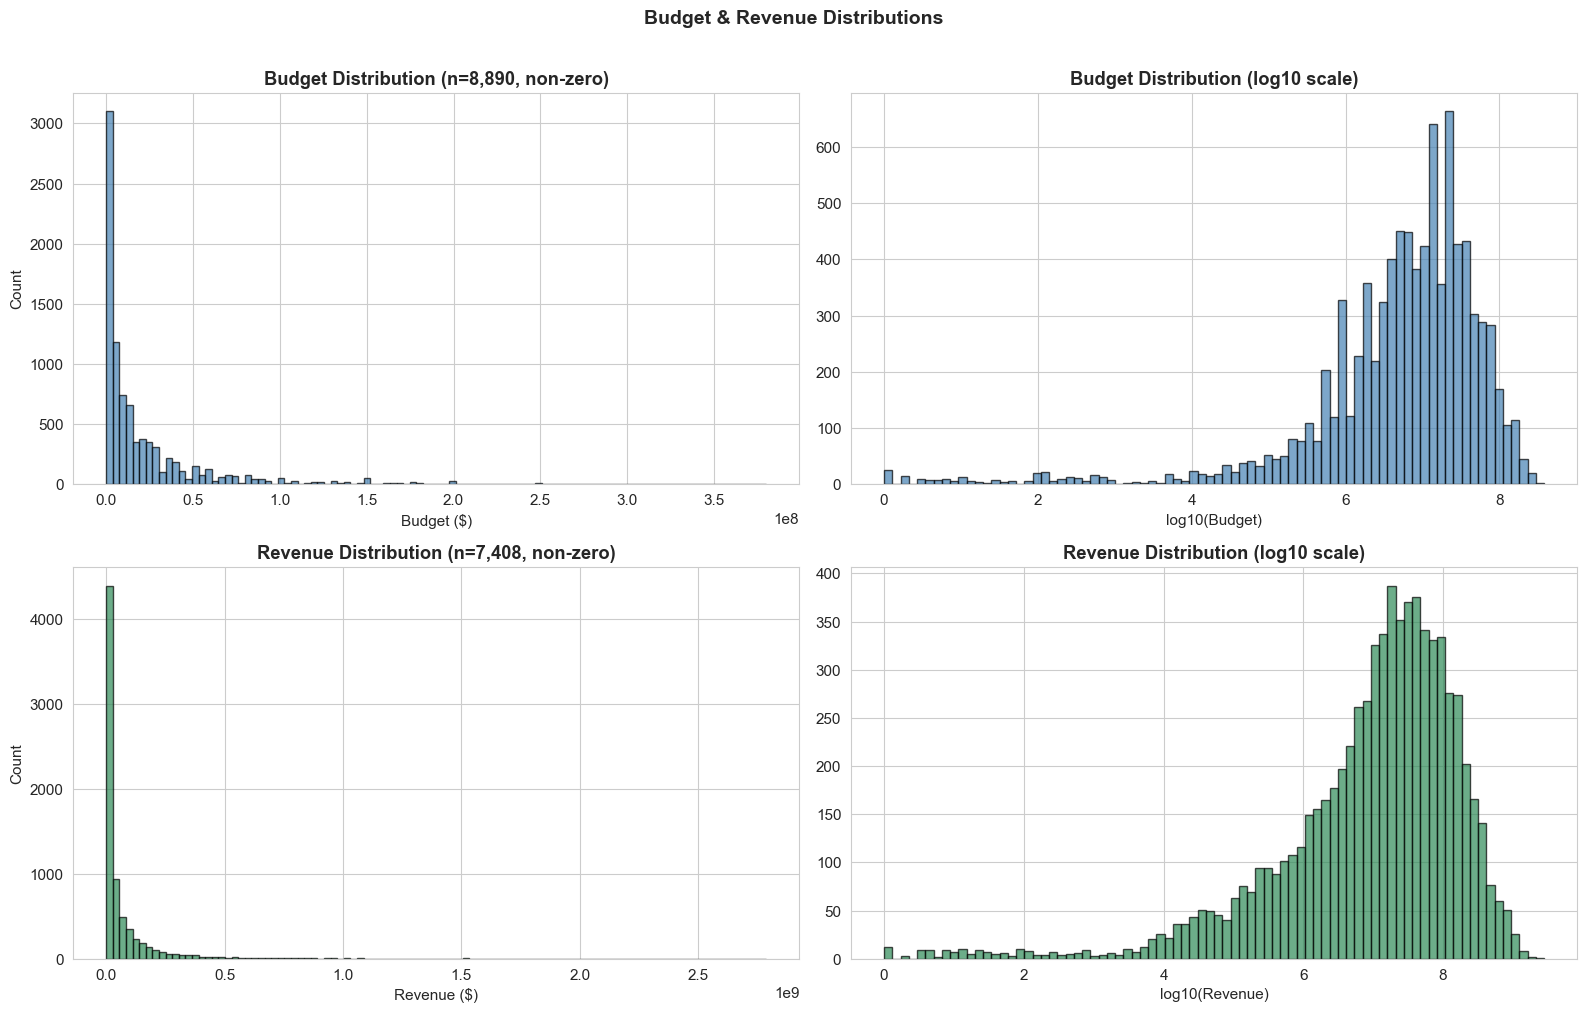


Budget: 8,890 non-zero / 45,466 total (19.6%)
Revenue: 7,408 non-zero / 45,466 total (16.3%)
Both non-zero: 5,381


In [22]:
# 3.1  Budget & Revenue distributions
fig, axes = plt.subplots(2, 2, figsize=(16, 10))

# Budget distribution (non-zero)
budget_nz = movies_viz.loc[movies_viz['budget'] > 0, 'budget']
axes[0, 0].hist(budget_nz, bins=100, color='steelblue', edgecolor='black', alpha=0.7)
axes[0, 0].set_title(f'Budget Distribution (n={len(budget_nz):,}, non-zero)', fontweight='bold')
axes[0, 0].set_xlabel('Budget ($)')
axes[0, 0].set_ylabel('Count')

# Budget log scale
axes[0, 1].hist(np.log10(budget_nz), bins=80, color='steelblue', edgecolor='black', alpha=0.7)
axes[0, 1].set_title('Budget Distribution (log10 scale)', fontweight='bold')
axes[0, 1].set_xlabel('log10(Budget)')

# Revenue distribution (non-zero)
revenue_nz = movies_viz.loc[movies_viz['revenue'] > 0, 'revenue']
axes[1, 0].hist(revenue_nz, bins=100, color='seagreen', edgecolor='black', alpha=0.7)
axes[1, 0].set_title(f'Revenue Distribution (n={len(revenue_nz):,}, non-zero)', fontweight='bold')
axes[1, 0].set_xlabel('Revenue ($)')
axes[1, 0].set_ylabel('Count')

# Revenue log scale
axes[1, 1].hist(np.log10(revenue_nz), bins=80, color='seagreen', edgecolor='black', alpha=0.7)
axes[1, 1].set_title('Revenue Distribution (log10 scale)', fontweight='bold')
axes[1, 1].set_xlabel('log10(Revenue)')

plt.suptitle('Budget & Revenue Distributions', fontsize=14, fontweight='bold', y=1.01)
plt.tight_layout()
plt.show()

print(f'\nBudget: {len(budget_nz):,} non-zero / {len(movies_viz):,} total ({len(budget_nz)/len(movies_viz)*100:.1f}%)')
print(f'Revenue: {len(revenue_nz):,} non-zero / {len(movies_viz):,} total ({len(revenue_nz)/len(movies_viz)*100:.1f}%)')
print(f'Both non-zero: {((movies_viz["budget"]>0) & (movies_viz["revenue"]>0)).sum():,}')

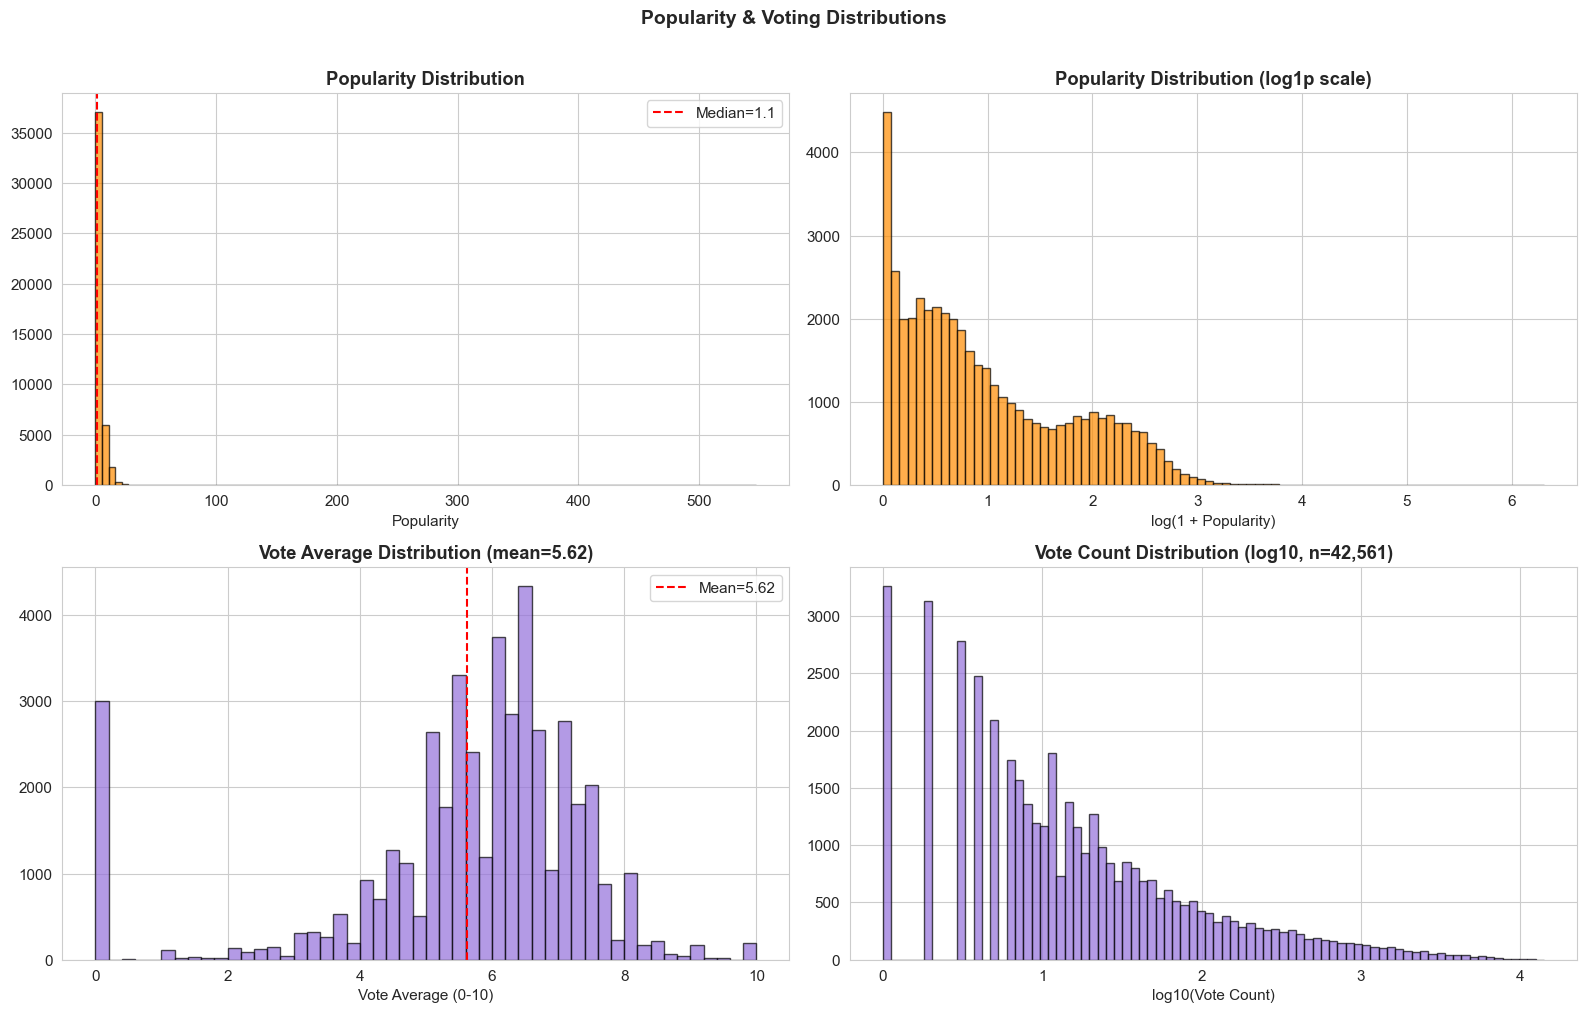

In [23]:
# 3.2  Popularity & Vote distributions
fig, axes = plt.subplots(2, 2, figsize=(16, 10))

# Popularity
pop = movies_viz['popularity'].dropna()
axes[0, 0].hist(pop, bins=100, color='darkorange', edgecolor='black', alpha=0.7)
axes[0, 0].set_title('Popularity Distribution', fontweight='bold')
axes[0, 0].set_xlabel('Popularity')
axes[0, 0].axvline(pop.median(), color='red', linestyle='--', label=f'Median={pop.median():.1f}')
axes[0, 0].legend()

# Popularity (log)
axes[0, 1].hist(np.log1p(pop), bins=80, color='darkorange', edgecolor='black', alpha=0.7)
axes[0, 1].set_title('Popularity Distribution (log1p scale)', fontweight='bold')
axes[0, 1].set_xlabel('log(1 + Popularity)')

# Vote average
va = movies_viz['vote_average'].dropna()
axes[1, 0].hist(va, bins=50, color='mediumpurple', edgecolor='black', alpha=0.7)
axes[1, 0].set_title(f'Vote Average Distribution (mean={va.mean():.2f})', fontweight='bold')
axes[1, 0].set_xlabel('Vote Average (0-10)')
axes[1, 0].axvline(va.mean(), color='red', linestyle='--', label=f'Mean={va.mean():.2f}')
axes[1, 0].legend()

# Vote count (log)
vc = movies_viz['vote_count'].dropna()
vc_nz = vc[vc > 0]
axes[1, 1].hist(np.log10(vc_nz), bins=80, color='mediumpurple', edgecolor='black', alpha=0.7)
axes[1, 1].set_title(f'Vote Count Distribution (log10, n={len(vc_nz):,})', fontweight='bold')
axes[1, 1].set_xlabel('log10(Vote Count)')

plt.suptitle('Popularity & Voting Distributions', fontsize=14, fontweight='bold', y=1.01)
plt.tight_layout()
plt.show()

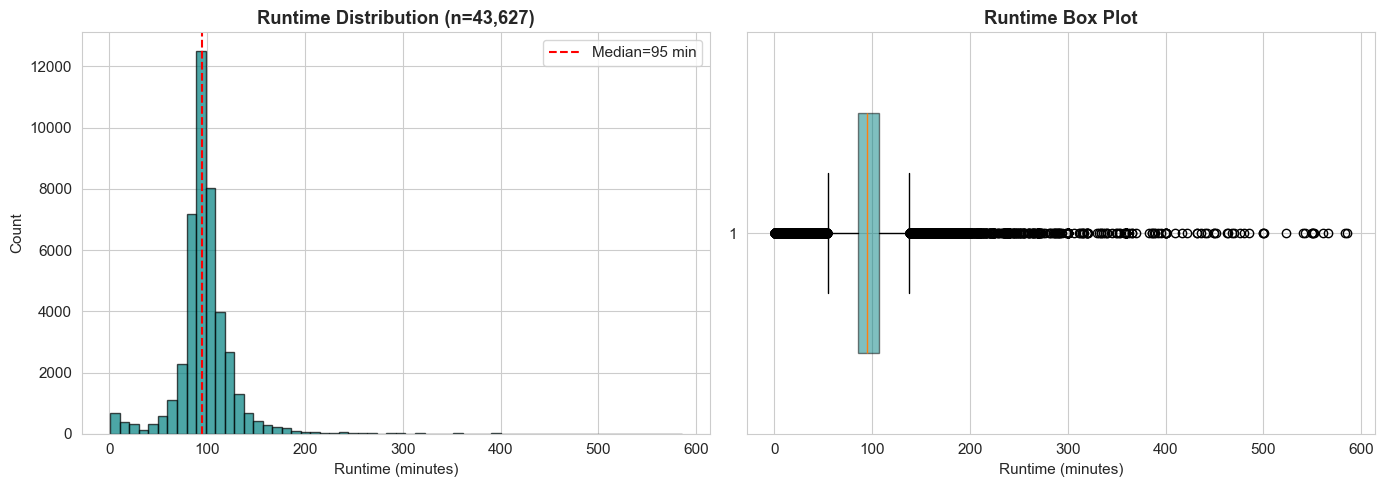

Runtime stats: mean=97.2, median=95, std=31.0, min=1, max=585


In [24]:
# 3.3  Runtime distribution
runtime = movies_viz['runtime'].dropna()
runtime_valid = runtime[(runtime > 0) & (runtime < 600)]  # exclude extreme outliers

fig, axes = plt.subplots(1, 2, figsize=(14, 5))

axes[0].hist(runtime_valid, bins=60, color='teal', edgecolor='black', alpha=0.7)
axes[0].set_title(f'Runtime Distribution (n={len(runtime_valid):,})', fontweight='bold')
axes[0].set_xlabel('Runtime (minutes)')
axes[0].set_ylabel('Count')
axes[0].axvline(runtime_valid.median(), color='red', linestyle='--', label=f'Median={runtime_valid.median():.0f} min')
axes[0].legend()

axes[1].boxplot(runtime_valid, vert=False, widths=0.6, patch_artist=True,
                boxprops=dict(facecolor='teal', alpha=0.5))
axes[1].set_title('Runtime Box Plot', fontweight='bold')
axes[1].set_xlabel('Runtime (minutes)')

plt.tight_layout()
plt.show()

print(f'Runtime stats: mean={runtime_valid.mean():.1f}, median={runtime_valid.median():.0f}, '
      f'std={runtime_valid.std():.1f}, min={runtime_valid.min():.0f}, max={runtime_valid.max():.0f}')

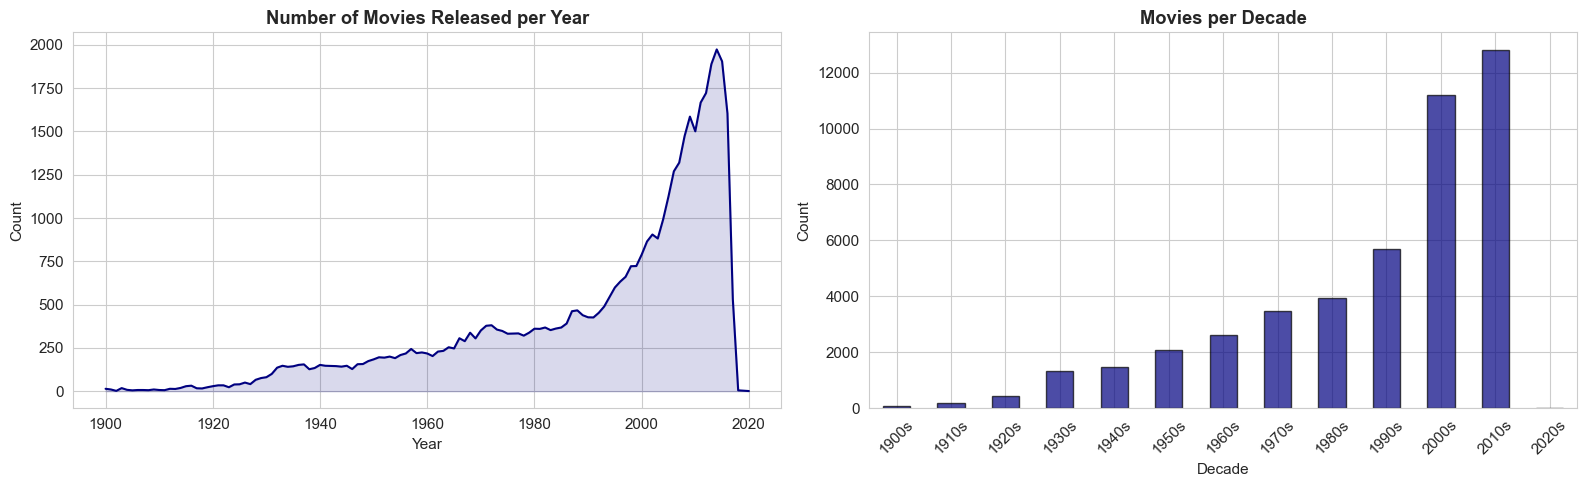

In [25]:
# 3.4  Temporal analysis: movies per year
year_counts = movies_viz['release_year'].dropna().astype(int)
year_counts = year_counts[(year_counts >= 1900) & (year_counts <= 2025)]

fig, axes = plt.subplots(1, 2, figsize=(16, 5))

# Movies per year
yc = year_counts.value_counts().sort_index()
yc.plot(kind='line', ax=axes[0], color='navy', linewidth=1.5)
axes[0].set_title('Number of Movies Released per Year', fontweight='bold')
axes[0].set_xlabel('Year')
axes[0].set_ylabel('Count')
axes[0].fill_between(yc.index, yc.values, alpha=0.15, color='navy')

# Movies per decade
decade = (year_counts // 10 * 10).value_counts().sort_index()
decade.plot(kind='bar', ax=axes[1], color='navy', alpha=0.7, edgecolor='black')
axes[1].set_title('Movies per Decade', fontweight='bold')
axes[1].set_xlabel('Decade')
axes[1].set_ylabel('Count')
axes[1].set_xticklabels([str(int(d)) + 's' for d in decade.index], rotation=45)

plt.tight_layout()
plt.show()

Total genre assignments: 91,106
Unique genres: 32

Genres per movie: mean=2.0, median=2, max=8


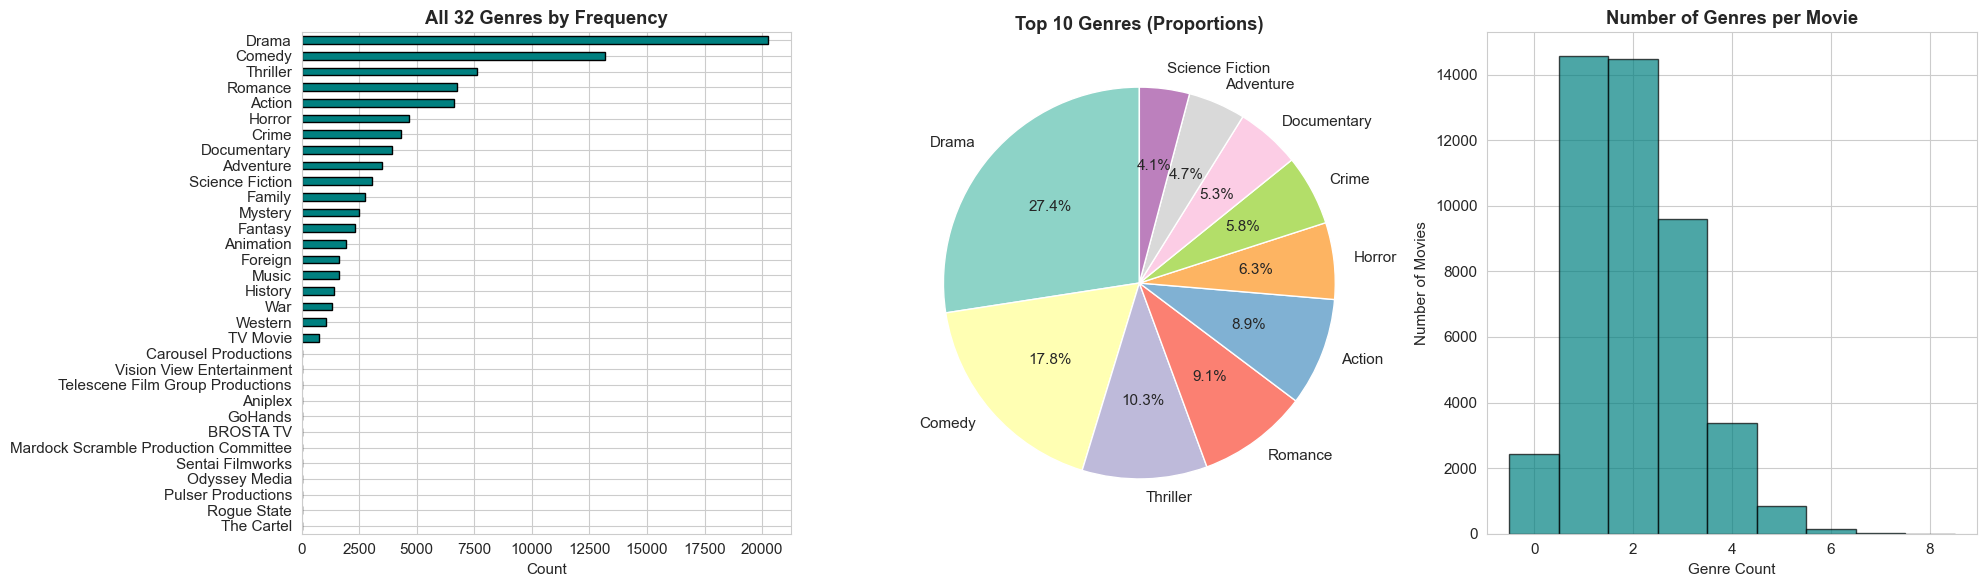

In [26]:
# 3.5  Genre analysis
movies_viz['genres_parsed'] = movies_viz['genres'].apply(parse_json_column)
genre_names = movies_viz['genres_parsed'].apply(lambda x: [g.get('name', '') for g in x if isinstance(g, dict)])
all_genres = pd.Series([g for sublist in genre_names for g in sublist if g])

print(f'Total genre assignments: {len(all_genres):,}')
print(f'Unique genres: {all_genres.nunique()}')

# Genres per movie
genres_per_movie = genre_names.apply(len)
print(f'\nGenres per movie: mean={genres_per_movie.mean():.1f}, median={genres_per_movie.median():.0f}, max={genres_per_movie.max()}')

fig, axes = plt.subplots(1, 3, figsize=(20, 6))

# Top genres bar chart
top_genres = all_genres.value_counts()
top_genres.plot(kind='barh', ax=axes[0], color='teal', edgecolor='black')
axes[0].set_title(f'All {all_genres.nunique()} Genres by Frequency', fontweight='bold')
axes[0].set_xlabel('Count')
axes[0].invert_yaxis()

# Pie chart top 10
top_genres.head(10).plot(kind='pie', ax=axes[1], autopct='%1.1f%%', startangle=90,
                         colors=plt.cm.Set3.colors)
axes[1].set_title('Top 10 Genres (Proportions)', fontweight='bold')
axes[1].set_ylabel('')

# Genres per movie histogram
genres_per_movie.hist(bins=range(0, genres_per_movie.max()+2), ax=axes[2],
                      color='teal', edgecolor='black', alpha=0.7, align='left')
axes[2].set_title('Number of Genres per Movie', fontweight='bold')
axes[2].set_xlabel('Genre Count')
axes[2].set_ylabel('Number of Movies')

plt.tight_layout()
plt.show()

Total company assignments: 70,545
Unique companies: 23,537
Companies per movie: mean=1.6, median=1


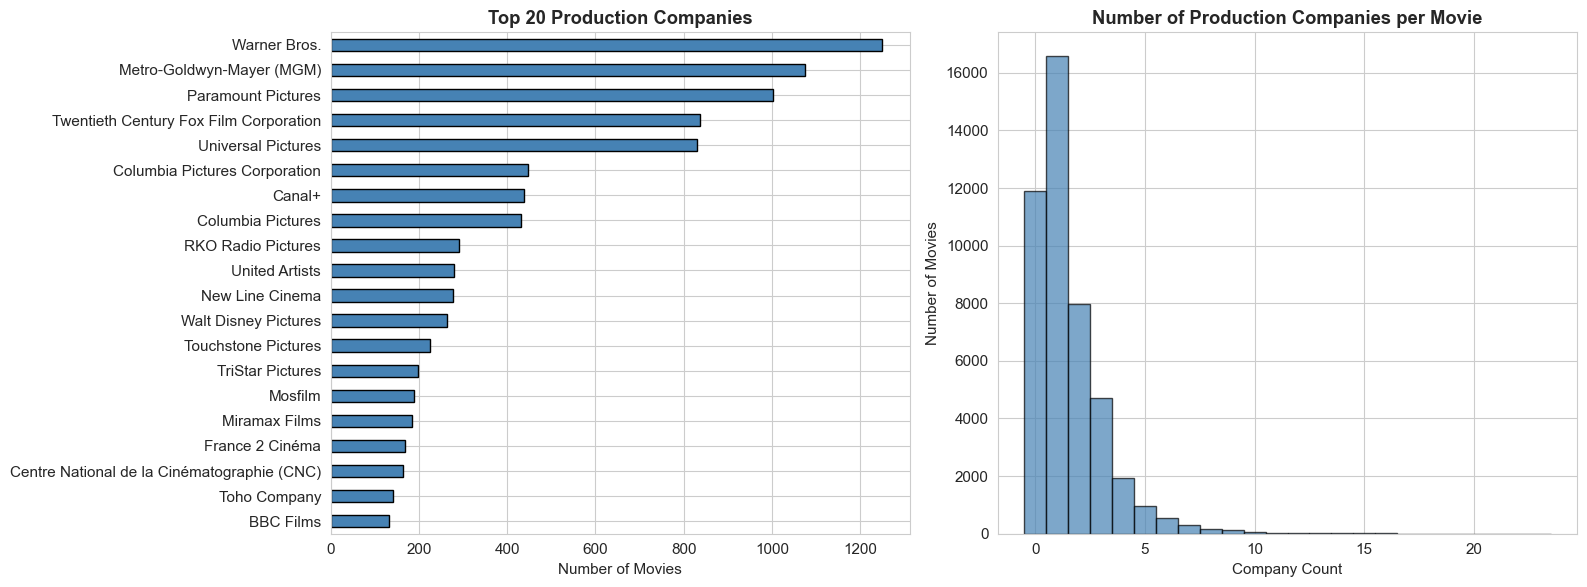

In [27]:
# 3.6  Production companies analysis
movies_viz['companies_parsed'] = movies_viz['production_companies'].apply(parse_json_column)
company_names = movies_viz['companies_parsed'].apply(
    lambda x: [c.get('name', '') for c in x if isinstance(c, dict)]
)
all_companies = pd.Series([c for sublist in company_names for c in sublist if c])

print(f'Total company assignments: {len(all_companies):,}')
print(f'Unique companies: {all_companies.nunique():,}')

companies_per_movie = company_names.apply(len)
print(f'Companies per movie: mean={companies_per_movie.mean():.1f}, median={companies_per_movie.median():.0f}')

fig, axes = plt.subplots(1, 2, figsize=(16, 6))

# Top 20 production companies
top_companies = all_companies.value_counts().head(20)
top_companies.sort_values().plot(kind='barh', ax=axes[0], color='steelblue', edgecolor='black')
axes[0].set_title('Top 20 Production Companies', fontweight='bold')
axes[0].set_xlabel('Number of Movies')

# Companies per movie distribution
companies_per_movie.hist(bins=range(0, min(companies_per_movie.max()+2, 25)), ax=axes[1],
                         color='steelblue', edgecolor='black', alpha=0.7, align='left')
axes[1].set_title('Number of Production Companies per Movie', fontweight='bold')
axes[1].set_xlabel('Company Count')
axes[1].set_ylabel('Number of Movies')

plt.tight_layout()
plt.show()

--- Original Language Distribution (top 15) ---
original_language
en    32269
fr     2438
it     1529
ja     1350
de     1080
es      994
ru      826
hi      508
ko      444
zh      409
sv      384
pt      316
cn      313
fi      297
nl      248


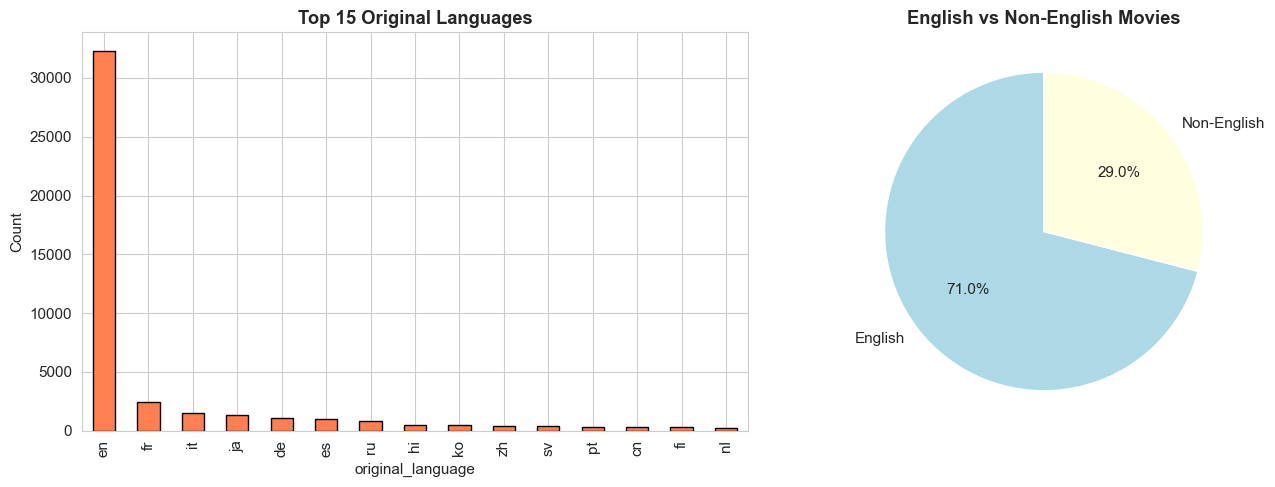

In [28]:
# 3.7  Language analysis
print('--- Original Language Distribution (top 15) ---')
lang_counts = movies_viz['original_language'].value_counts()
print(lang_counts.head(15).to_string())

fig, axes = plt.subplots(1, 2, figsize=(14, 5))

lang_counts.head(15).plot(kind='bar', ax=axes[0], color='coral', edgecolor='black')
axes[0].set_title('Top 15 Original Languages', fontweight='bold')
axes[0].set_ylabel('Count')

# English vs non-English
en_vs_other = pd.Series({
    'English': (movies_viz['original_language'] == 'en').sum(),
    'Non-English': (movies_viz['original_language'] != 'en').sum()
})
en_vs_other.plot(kind='pie', ax=axes[1], autopct='%1.1f%%', colors=['lightblue', 'lightyellow'],
                 startangle=90)
axes[1].set_title('English vs Non-English Movies', fontweight='bold')
axes[1].set_ylabel('')

plt.tight_layout()
plt.show()

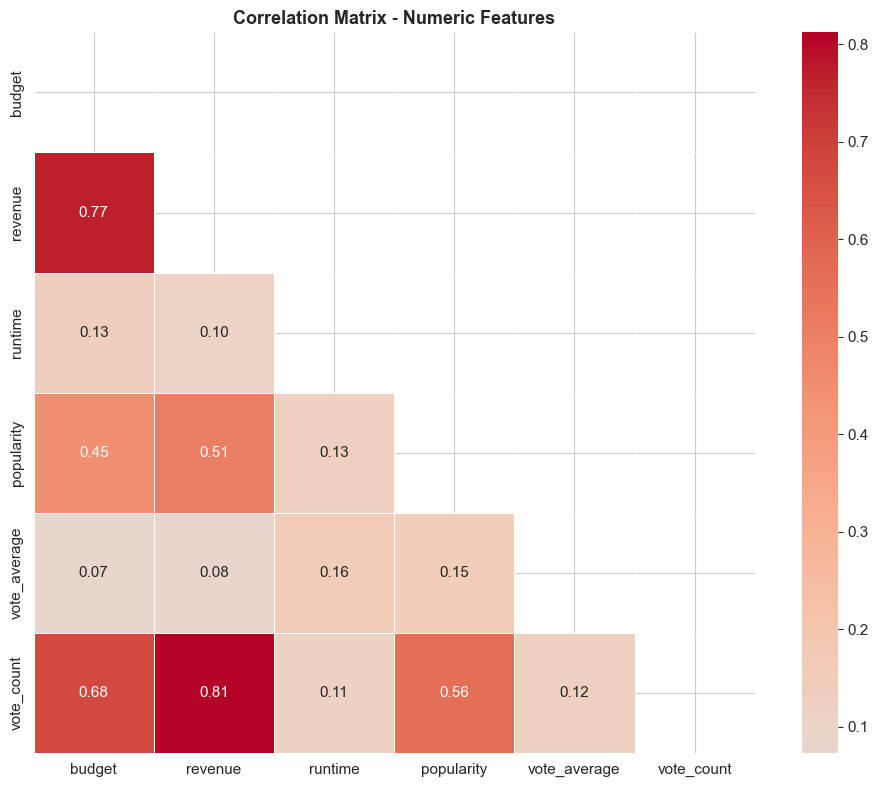

Key correlations with revenue:
vote_count      0.811986
budget          0.768732
popularity      0.506074
runtime         0.103917
vote_average    0.083768


In [29]:
# 3.8  Correlation heatmap (numeric columns)
corr_cols = ['budget', 'revenue', 'runtime', 'popularity', 'vote_average', 'vote_count']
corr_data = movies_viz[corr_cols].dropna()

plt.figure(figsize=(10, 8))
corr_matrix = corr_data.corr()
mask = np.triu(np.ones_like(corr_matrix, dtype=bool))
sns.heatmap(corr_matrix, annot=True, fmt='.2f', cmap='coolwarm', center=0,
            mask=mask, square=True, linewidths=0.5)
plt.title('Correlation Matrix - Numeric Features', fontsize=13, fontweight='bold')
plt.tight_layout()
plt.show()

print('Key correlations with revenue:')
print(corr_matrix['revenue'].drop('revenue').sort_values(ascending=False).to_string())

Movies with both budget & revenue > 0: 5,381


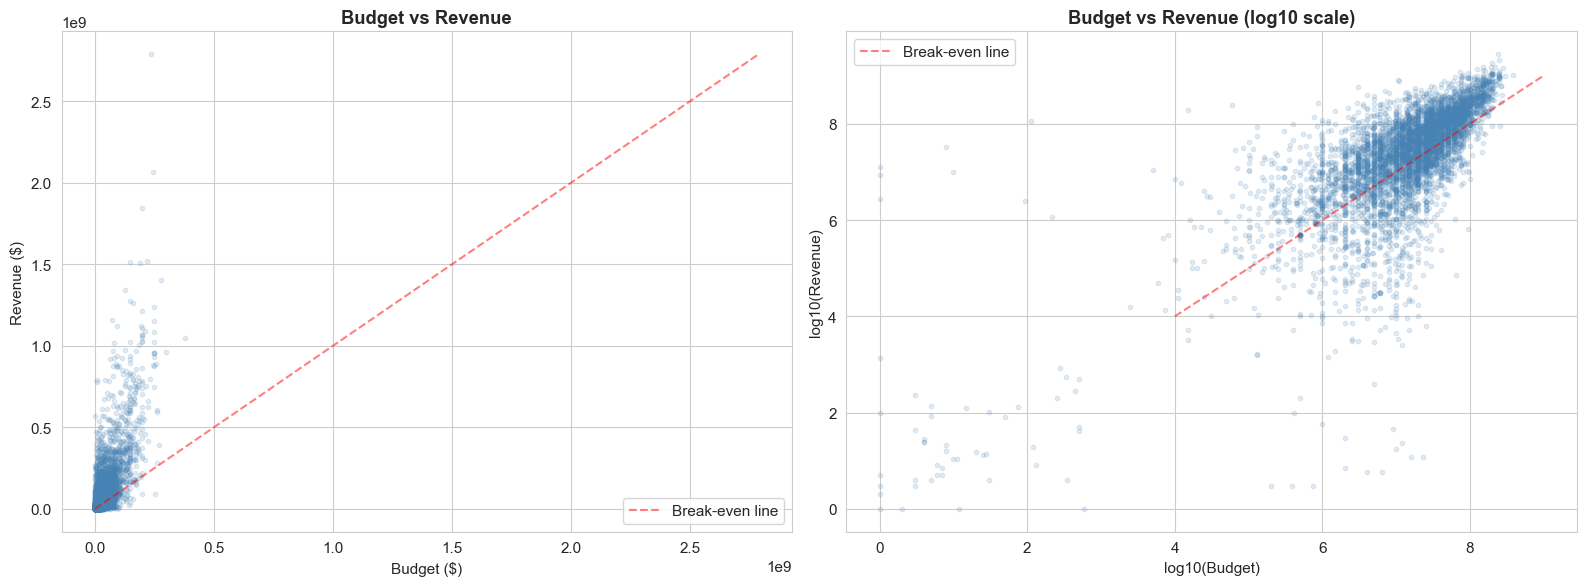

In [30]:
# 3.9  Budget vs Revenue scatter (non-zero values only)
both_nz = movies_viz[(movies_viz['budget'] > 0) & (movies_viz['revenue'] > 0)].copy()
print(f'Movies with both budget & revenue > 0: {len(both_nz):,}')

fig, axes = plt.subplots(1, 2, figsize=(16, 6))

# Linear scale
axes[0].scatter(both_nz['budget'], both_nz['revenue'], alpha=0.15, s=10, c='steelblue')
max_val = max(both_nz['budget'].max(), both_nz['revenue'].max())
axes[0].plot([0, max_val], [0, max_val], 'r--', alpha=0.5, label='Break-even line')
axes[0].set_title('Budget vs Revenue', fontweight='bold')
axes[0].set_xlabel('Budget ($)')
axes[0].set_ylabel('Revenue ($)')
axes[0].legend()

# Log scale
axes[1].scatter(np.log10(both_nz['budget']), np.log10(both_nz['revenue']),
                alpha=0.15, s=10, c='steelblue')
axes[1].plot([4, 9], [4, 9], 'r--', alpha=0.5, label='Break-even line')
axes[1].set_title('Budget vs Revenue (log10 scale)', fontweight='bold')
axes[1].set_xlabel('log10(Budget)')
axes[1].set_ylabel('log10(Revenue)')
axes[1].legend()

plt.tight_layout()
plt.show()

---
## 4. Credits Dataset - Structure & Quality

In [31]:
# 4.1  Credits overview
print('=' * 90)
print('CREDITS DATASET - OVERVIEW')
print('=' * 90)
print(f'Shape: {credits_df.shape}')
print(f'\nColumn types:\n{credits_df.dtypes}')
print(f'\nMissing values:\n{credits_df.isnull().sum()}')
print(f'\nDuplicate IDs: {credits_df["id"].duplicated().sum()}')
print(f'Unique IDs: {credits_df["id"].nunique():,}')

print(f'\n--- Sample cast entry (truncated) ---')
print(str(credits_df['cast'].iloc[0])[:300])
print(f'\n--- Sample crew entry (truncated) ---')
print(str(credits_df['crew'].iloc[0])[:300])

CREDITS DATASET - OVERVIEW
Shape: (45476, 3)

Column types:
cast      str
crew      str
id      int64
dtype: object

Missing values:
cast    0
crew    0
id      0
dtype: int64

Duplicate IDs: 44
Unique IDs: 45,432

--- Sample cast entry (truncated) ---
[{'cast_id': 14, 'character': 'Woody (voice)', 'credit_id': '52fe4284c3a36847f8024f95', 'gender': 2, 'id': 31, 'name': 'Tom Hanks', 'order': 0, 'profile_path': '/pQFoyx7rp09CJTAb932F2g8Nlho.jpg'}, {'cast_id': 15, 'character': 'Buzz Lightyear (voice)', 'credit_id': '52fe4284c3a36847f8024f99', 'gender

--- Sample crew entry (truncated) ---
[{'credit_id': '52fe4284c3a36847f8024f49', 'department': 'Directing', 'gender': 2, 'id': 7879, 'job': 'Director', 'name': 'John Lasseter', 'profile_path': '/7EdqiNbr4FRjIhKHyPPdFfEEEFG.jpg'}, {'credit_id': '52fe4284c3a36847f8024f4f', 'department': 'Writing', 'gender': 2, 'id': 12891, 'job': 'Screenp


In [32]:
# 4.2  Parse cast & crew JSON columns
print('Parsing cast & crew columns...')
credits_df['cast_parsed'] = credits_df['cast'].apply(parse_json_column)
credits_df['crew_parsed'] = credits_df['crew'].apply(parse_json_column)

# Verify parsing
cast_ok = credits_df['cast_parsed'].apply(lambda x: isinstance(x, list) and len(x) > 0).sum()
crew_ok = credits_df['crew_parsed'].apply(lambda x: isinstance(x, list) and len(x) > 0).sum()
print(f'Cast parsed successfully: {cast_ok:,} / {len(credits_df):,} ({cast_ok/len(credits_df)*100:.1f}%)')
print(f'Crew parsed successfully: {crew_ok:,} / {len(credits_df):,} ({crew_ok/len(credits_df)*100:.1f}%)')

# Show parsed structure
print('\n--- Cast entry fields ---')
sample_cast = credits_df['cast_parsed'].iloc[0]
if sample_cast:
    print(f'  Keys: {list(sample_cast[0].keys())}')
    print(f'  Example: {sample_cast[0]}')

print('\n--- Crew entry fields ---')
sample_crew = credits_df['crew_parsed'].iloc[0]
if sample_crew:
    print(f'  Keys: {list(sample_crew[0].keys())}')
    print(f'  Example: {sample_crew[0]}')

Parsing cast & crew columns...
Cast parsed successfully: 43,058 / 45,476 (94.7%)
Crew parsed successfully: 44,705 / 45,476 (98.3%)

--- Cast entry fields ---
  Keys: ['cast_id', 'character', 'credit_id', 'gender', 'id', 'name', 'order', 'profile_path']
  Example: {'cast_id': 14, 'character': 'Woody (voice)', 'credit_id': '52fe4284c3a36847f8024f95', 'gender': 2, 'id': 31, 'name': 'Tom Hanks', 'order': 0, 'profile_path': '/pQFoyx7rp09CJTAb932F2g8Nlho.jpg'}

--- Crew entry fields ---
  Keys: ['credit_id', 'department', 'gender', 'id', 'job', 'name', 'profile_path']
  Example: {'credit_id': '52fe4284c3a36847f8024f49', 'department': 'Directing', 'gender': 2, 'id': 7879, 'job': 'Director', 'name': 'John Lasseter', 'profile_path': '/7EdqiNbr4FRjIhKHyPPdFfEEEFG.jpg'}


---
## 5. Credits - Distributions & Visualizations

--- Cast Size Statistics ---
count    45476.0
mean        12.4
std         12.1
min          0.0
25%          6.0
50%         10.0
75%         15.0
max        313.0

--- Crew Size Statistics ---
count    45476.0
mean        10.2
std         15.8
min          0.0
25%          2.0
50%          6.0
75%         12.0
max        435.0


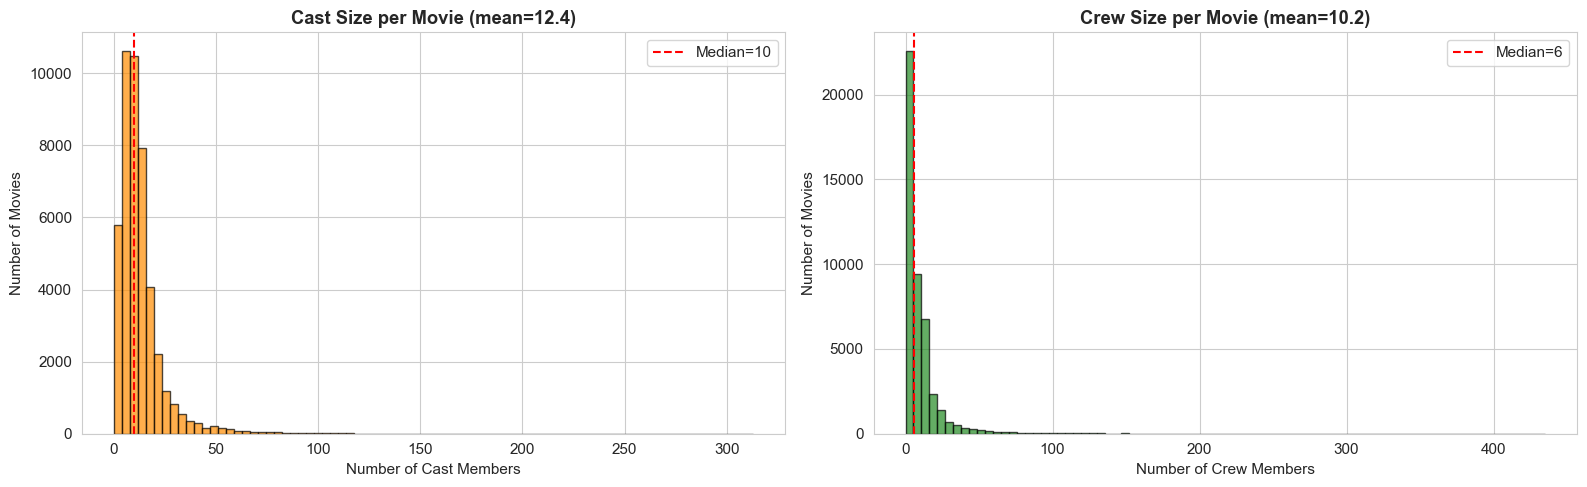

In [33]:
# 5.1  Cast & Crew size analysis
credits_df['cast_size'] = credits_df['cast_parsed'].apply(len)
credits_df['crew_size'] = credits_df['crew_parsed'].apply(len)

print('--- Cast Size Statistics ---')
print(credits_df['cast_size'].describe().round(1).to_string())
print(f'\n--- Crew Size Statistics ---')
print(credits_df['crew_size'].describe().round(1).to_string())

fig, axes = plt.subplots(1, 2, figsize=(16, 5))

credits_df['cast_size'].hist(bins=80, ax=axes[0], color='darkorange', edgecolor='black', alpha=0.7)
axes[0].set_title(f'Cast Size per Movie (mean={credits_df["cast_size"].mean():.1f})', fontweight='bold')
axes[0].set_xlabel('Number of Cast Members')
axes[0].set_ylabel('Number of Movies')
axes[0].axvline(credits_df['cast_size'].median(), color='red', linestyle='--',
                label=f'Median={credits_df["cast_size"].median():.0f}')
axes[0].legend()

credits_df['crew_size'].hist(bins=80, ax=axes[1], color='forestgreen', edgecolor='black', alpha=0.7)
axes[1].set_title(f'Crew Size per Movie (mean={credits_df["crew_size"].mean():.1f})', fontweight='bold')
axes[1].set_xlabel('Number of Crew Members')
axes[1].set_ylabel('Number of Movies')
axes[1].axvline(credits_df['crew_size'].median(), color='red', linestyle='--',
                label=f'Median={credits_df["crew_size"].median():.0f}')
axes[1].legend()

plt.tight_layout()
plt.show()

Total actor appearances: 562,474
Unique actors: 202,747


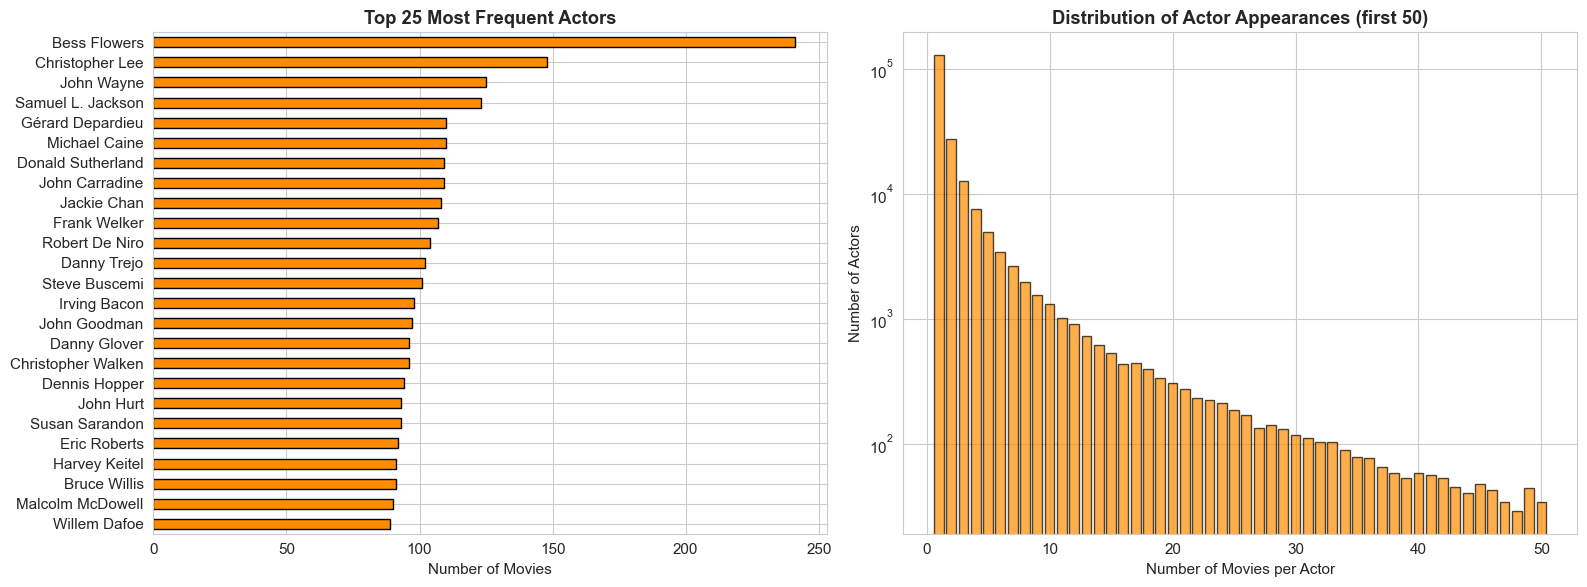

In [34]:
# 5.2  Most frequent actors
all_actors = []
for cast_list in credits_df['cast_parsed']:
    for member in cast_list:
        if isinstance(member, dict) and member.get('name'):
            all_actors.append(member['name'])

actor_counts = pd.Series(all_actors).value_counts()
print(f'Total actor appearances: {len(all_actors):,}')
print(f'Unique actors: {actor_counts.shape[0]:,}')

fig, axes = plt.subplots(1, 2, figsize=(16, 6))

# Top 25 actors
actor_counts.head(25).sort_values().plot(kind='barh', ax=axes[0], color='darkorange', edgecolor='black')
axes[0].set_title('Top 25 Most Frequent Actors', fontweight='bold')
axes[0].set_xlabel('Number of Movies')

# Actor appearance distribution (log scale)
appearance_dist = actor_counts.value_counts().sort_index()
axes[1].bar(appearance_dist.index[:50], appearance_dist.values[:50],
            color='darkorange', alpha=0.7, edgecolor='black')
axes[1].set_title('Distribution of Actor Appearances (first 50)', fontweight='bold')
axes[1].set_xlabel('Number of Movies per Actor')
axes[1].set_ylabel('Number of Actors')
axes[1].set_yscale('log')

plt.tight_layout()
plt.show()

Lead actors (order=0): 36,747 appearances, 51 unique
Top-billed (order<=3): 158,060 appearances, 77 unique


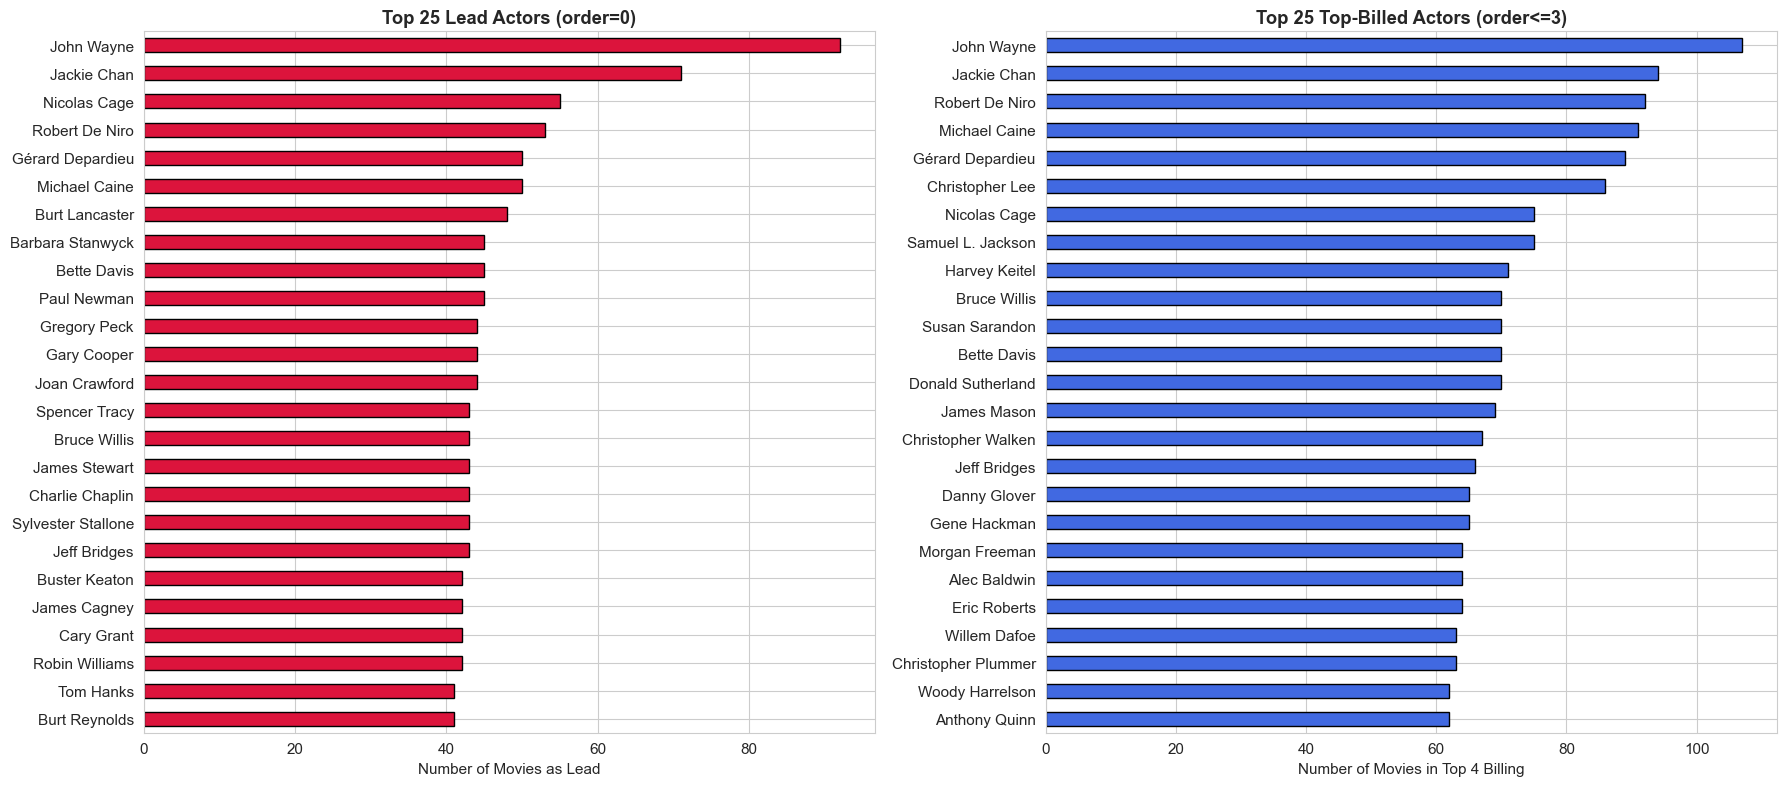


--- Comparison: All appearances vs Lead role ---
                    total_appearances  as_lead  top_4_billing  lead_pct
Bess Flowers                      241        0              1       0.0
Christopher Lee                   148       41             86      27.7
John Wayne                        125       92            107      73.6
Samuel L. Jackson                 123       35             75      28.5
Gérard Depardieu                  110       50             89      45.5
Michael Caine                     110       50             91      45.5
Donald Sutherland                 109       22             70      20.2
John Carradine                    109       11             34      10.1
Jackie Chan                       108       71             94      65.7
Frank Welker                      107       16             35      15.0
Robert De Niro                    104       53             92      51.0
Danny Trejo                       102       18             46      17.6
Steve Buscemi 

In [50]:
# 5.2b  Lead actors (order=0) vs Top-billed actors (order<=3)
# The 'order' field = billing position: 0=lead, 1=second-billed, etc.

lead_actors = []
top_billed_actors = []
for cast_list in credits_df['cast_parsed']:
    for member in cast_list:
        if isinstance(member, dict) and member.get('name') and 'order' in member:
            if member['order'] == 0:
                lead_actors.append(member['name'])
            if member['order'] <= 3:
                top_billed_actors.append(member['name'])

lead_counts = pd.Series(lead_actors).value_counts()
top_billed_counts = pd.Series(top_billed_actors).value_counts()

print(f'Lead actors (order=0): {len(lead_actors):,} appearances, {lead_counts.nunique():,} unique')
print(f'Top-billed (order<=3): {len(top_billed_actors):,} appearances, {top_billed_counts.nunique():,} unique')

fig, axes = plt.subplots(1, 2, figsize=(18, 8))

# Top 25 lead actors
lead_counts.head(25).sort_values().plot(kind='barh', ax=axes[0], color='crimson', edgecolor='black')
axes[0].set_title('Top 25 Lead Actors (order=0)', fontweight='bold')
axes[0].set_xlabel('Number of Movies as Lead')

# Top 25 top-billed actors (order <= 3)
top_billed_counts.head(25).sort_values().plot(kind='barh', ax=axes[1], color='royalblue', edgecolor='black')
axes[1].set_title('Top 25 Top-Billed Actors (order<=3)', fontweight='bold')
axes[1].set_xlabel('Number of Movies in Top 4 Billing')

plt.tight_layout()
plt.show()

# Compare: actors who appear a lot overall but rarely as leads
print('\n--- Comparison: All appearances vs Lead role ---')
comparison = pd.DataFrame({
    'total_appearances': actor_counts.head(25),
    'as_lead': lead_counts.reindex(actor_counts.head(25).index, fill_value=0),
    'top_4_billing': top_billed_counts.reindex(actor_counts.head(25).index, fill_value=0),
})
comparison['lead_pct'] = (comparison['as_lead'] / comparison['total_appearances'] * 100).round(1)
print(comparison.to_string())

Directors active post-2010: 9,923
Their total movie credits (all years): 24,549


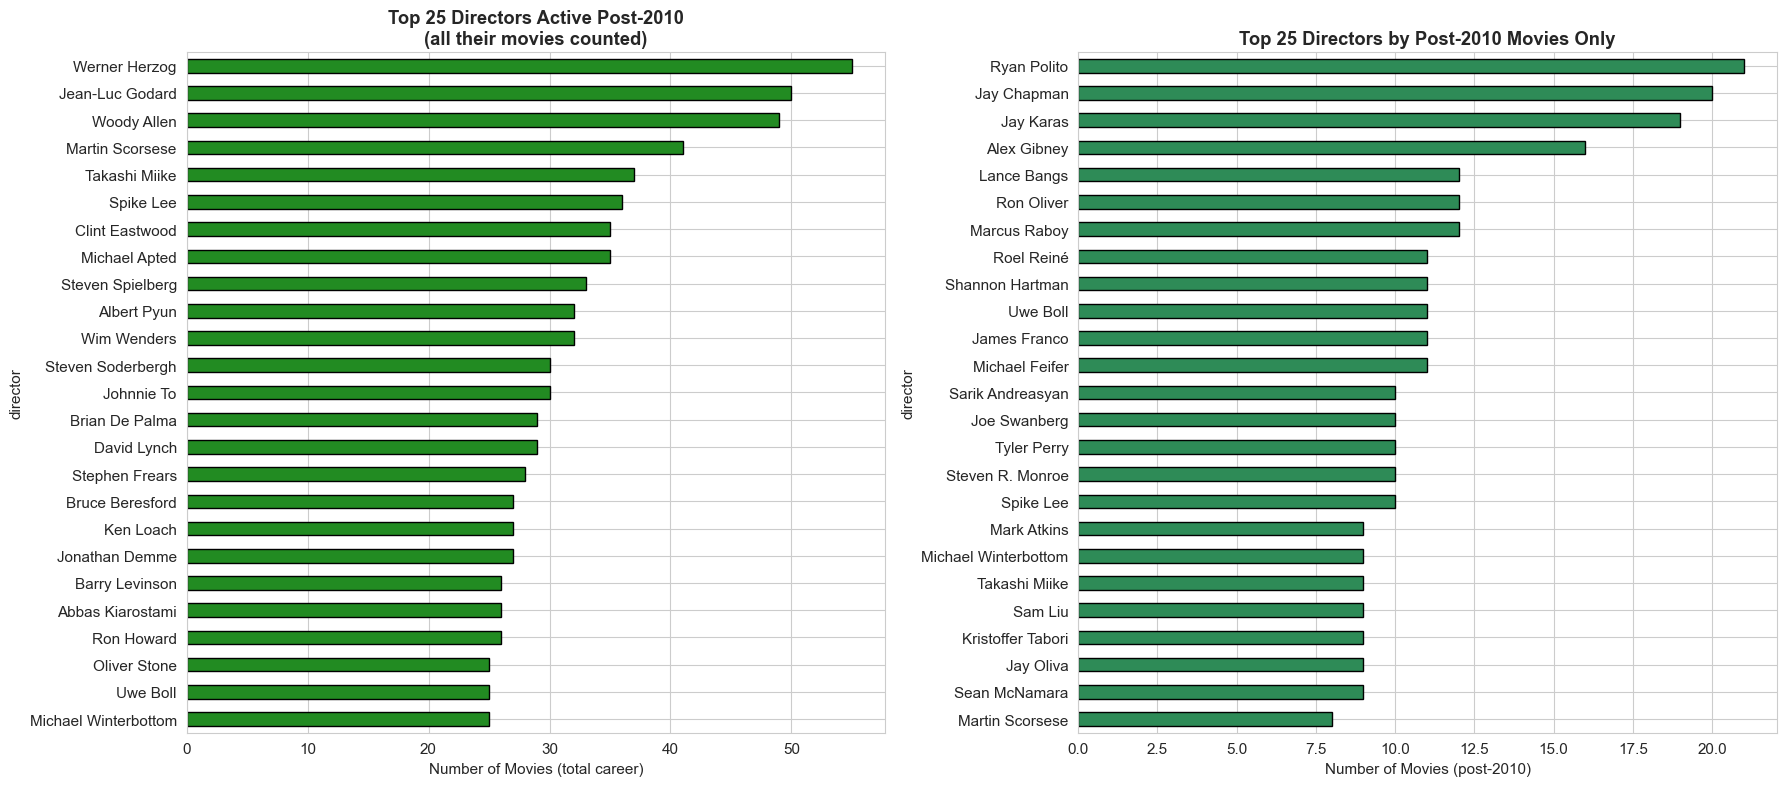


--- Top 25 Modern Directors: Career vs Post-2010 ---
                      total_movies  post_2010  post2010_pct
director                                                   
Werner Herzog                   55          8          14.5
Jean-Luc Godard                 50          2           4.0
Woody Allen                     49          8          16.3
Martin Scorsese                 41          8          19.5
Takashi Miike                   37          9          24.3
Spike Lee                       36         10          27.8
Clint Eastwood                  35          5          14.3
Michael Apted                   35          4          11.4
Steven Spielberg                33          5          15.2
Albert Pyun                     32          1           3.1
Wim Wenders                     32          3           9.4
Steven Soderbergh               30          6          20.0
Johnnie To                      30          6          20.0
Brian De Palma                  29          1 

In [56]:
# 5.2c  Modern Directors — active post-2010 (relevant for prediction)
# Merge credits with movies to get release year, then filter directors with >= 1 movie after 2010

# Build a movie_id -> release_year mapping from movies_df
movies_year = movies_df[['id', 'release_date']].copy()
movies_year['release_date'] = pd.to_datetime(movies_year['release_date'], errors='coerce')
movies_year['release_year'] = movies_year['release_date'].dt.year
movies_year['id'] = pd.to_numeric(movies_year['id'], errors='coerce')
movies_year = movies_year.dropna(subset=['id', 'release_year'])
movies_year['id'] = movies_year['id'].astype(int)
year_lookup = dict(zip(movies_year['id'], movies_year['release_year']))

# Extract (director_name, movie_id) pairs
director_movie_pairs = []
for _, row in credits_df.iterrows():
    movie_id = row['id']
    for member in row['crew_parsed']:
        if isinstance(member, dict) and member.get('job') == 'Director' and member.get('name'):
            director_movie_pairs.append((member['name'], movie_id))

dir_df = pd.DataFrame(director_movie_pairs, columns=['director', 'movie_id'])
dir_df['year'] = dir_df['movie_id'].map(year_lookup)
dir_df = dir_df.dropna(subset=['year'])

# Directors with at least 1 movie after 2010
modern_directors = set(dir_df[dir_df['year'] >= 2010]['director'].unique())
dir_modern = dir_df[dir_df['director'].isin(modern_directors)]

modern_dir_counts = dir_modern['director'].value_counts()
print(f"Directors active post-2010: {len(modern_directors):,}")
print(f"Their total movie credits (all years): {len(dir_modern):,}")

fig, axes = plt.subplots(1, 2, figsize=(18, 8))

# Top 25 modern directors — all their movies
modern_dir_counts.head(25).sort_values().plot(kind='barh', ax=axes[0], color='forestgreen', edgecolor='black')
axes[0].set_title('Top 25 Directors Active Post-2010\n(all their movies counted)', fontweight='bold')
axes[0].set_xlabel('Number of Movies (total career)')

# Top 25 modern directors — only post-2010 movies
dir_post2010 = dir_df[dir_df['year'] >= 2010]
post2010_dir_counts = dir_post2010['director'].value_counts()
post2010_dir_counts.head(25).sort_values().plot(kind='barh', ax=axes[1], color='seagreen', edgecolor='black')
axes[1].set_title('Top 25 Directors by Post-2010 Movies Only', fontweight='bold')
axes[1].set_xlabel('Number of Movies (post-2010)')

plt.tight_layout()
plt.show()

# Show comparison table
print("\n--- Top 25 Modern Directors: Career vs Post-2010 ---")
top_modern = modern_dir_counts.head(25)
dir_comparison = pd.DataFrame({
    'total_movies': top_modern,
    'post_2010': post2010_dir_counts.reindex(top_modern.index, fill_value=0),
})
dir_comparison['post2010_pct'] = (dir_comparison['post_2010'] / dir_comparison['total_movies'] * 100).round(1)
print(dir_comparison.to_string())
print(f"\n>> Suggestion: Use top ~25-50 modern directors as binary feature 'has_top_director'")

Actors active post-2010: 84,437
Their total appearances (all years): 294,068


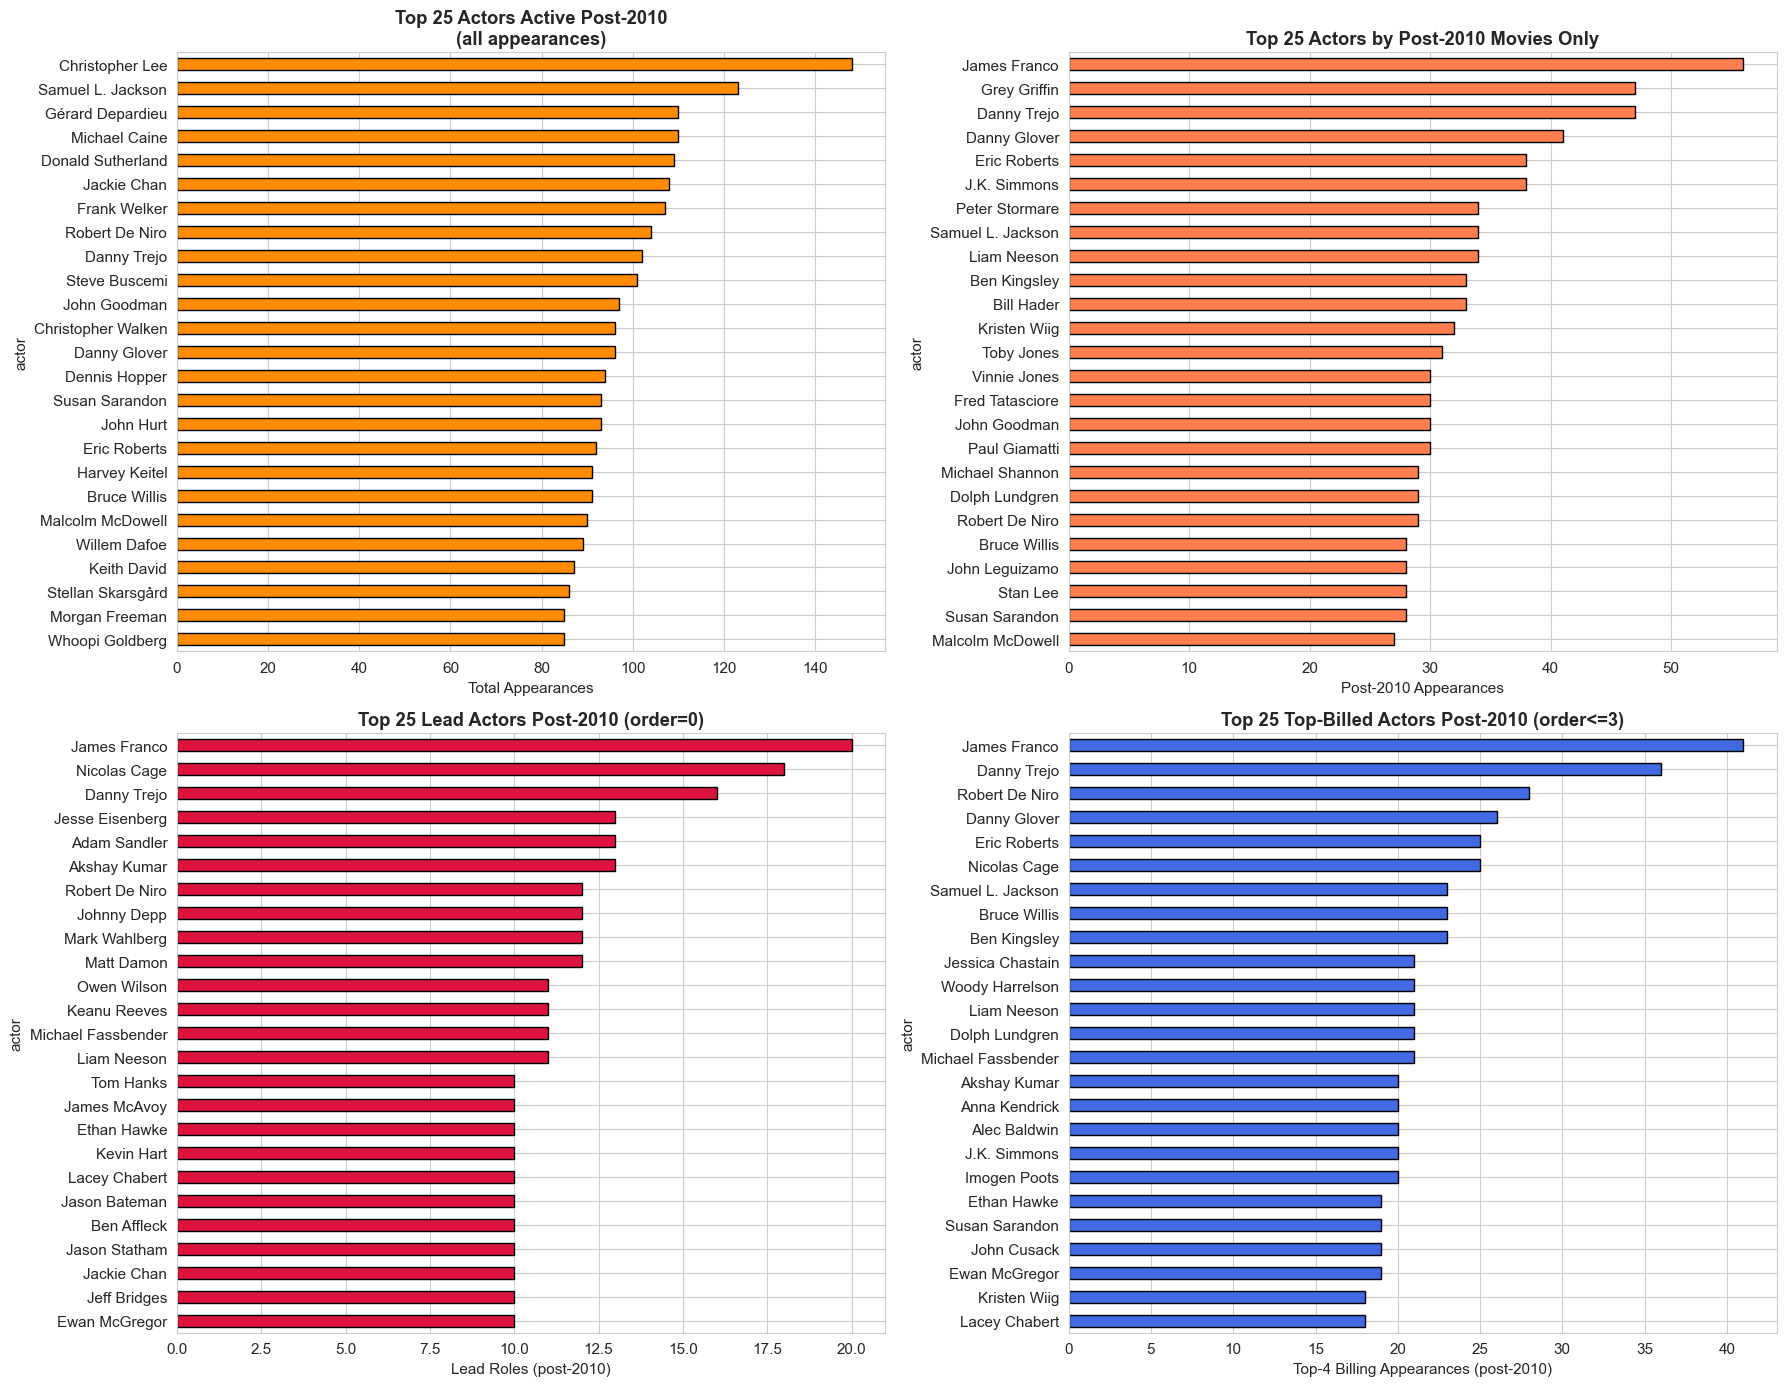


--- Top 25 Modern Actors: All vs Post-2010 vs Lead ---
                   total_career  post_2010  lead_post2010  top4_post2010  lead_pct
actor                                                                             
James Franco                 83         56             20             41      35.7
Danny Trejo                 102         47             16             36      34.0
Grey Griffin                 71         47              0             17       0.0
Danny Glover                 96         41              6             26      14.6
Eric Roberts                 92         38              8             25      21.1
J.K. Simmons                 78         38              3             20       7.9
Liam Neeson                  82         34             11             21      32.4
Samuel L. Jackson           123         34              9             23      26.5
Peter Stormare               77         34              2             13       5.9
Ben Kingsley                 79

In [57]:
# 5.2d  Modern Actors — active post-2010 (relevant for prediction)
# Same approach: filter to actors with at least 1 movie after 2010

# Extract (actor_name, movie_id, order) triples
actor_movie_pairs = []
for _, row in credits_df.iterrows():
    movie_id = row['id']
    for member in row['cast_parsed']:
        if isinstance(member, dict) and member.get('name') and 'order' in member:
            actor_movie_pairs.append((member['name'], movie_id, member['order']))

act_df = pd.DataFrame(actor_movie_pairs, columns=['actor', 'movie_id', 'order'])
act_df['year'] = act_df['movie_id'].map(year_lookup)  # reuse year_lookup from directors cell
act_df = act_df.dropna(subset=['year'])

# Actors with at least 1 movie after 2010
modern_actors_set = set(act_df[act_df['year'] >= 2010]['actor'].unique())
act_modern = act_df[act_df['actor'].isin(modern_actors_set)]

modern_act_counts = act_modern['actor'].value_counts()
print(f"Actors active post-2010: {len(modern_actors_set):,}")
print(f"Their total appearances (all years): {len(act_modern):,}")

fig, axes = plt.subplots(2, 2, figsize=(18, 14))

# Top 25 modern actors — all appearances
modern_act_counts.head(25).sort_values().plot(kind='barh', ax=axes[0, 0], color='darkorange', edgecolor='black')
axes[0, 0].set_title('Top 25 Actors Active Post-2010\n(all appearances)', fontweight='bold')
axes[0, 0].set_xlabel('Total Appearances')

# Top 25 modern actors — post-2010 only
act_post2010 = act_df[act_df['year'] >= 2010]
post2010_act_counts = act_post2010['actor'].value_counts()
post2010_act_counts.head(25).sort_values().plot(kind='barh', ax=axes[0, 1], color='coral', edgecolor='black')
axes[0, 1].set_title('Top 25 Actors by Post-2010 Movies Only', fontweight='bold')
axes[0, 1].set_xlabel('Post-2010 Appearances')

# Top 25 modern LEAD actors (order=0) — post-2010 only
lead_post2010 = act_post2010[act_post2010['order'] == 0]
lead_post2010_counts = lead_post2010['actor'].value_counts()
lead_post2010_counts.head(25).sort_values().plot(kind='barh', ax=axes[1, 0], color='crimson', edgecolor='black')
axes[1, 0].set_title('Top 25 Lead Actors Post-2010 (order=0)', fontweight='bold')
axes[1, 0].set_xlabel('Lead Roles (post-2010)')

# Top 25 modern top-billed actors (order<=3) — post-2010 only
top4_post2010 = act_post2010[act_post2010['order'] <= 3]
top4_post2010_counts = top4_post2010['actor'].value_counts()
top4_post2010_counts.head(25).sort_values().plot(kind='barh', ax=axes[1, 1], color='royalblue', edgecolor='black')
axes[1, 1].set_title('Top 25 Top-Billed Actors Post-2010 (order<=3)', fontweight='bold')
axes[1, 1].set_xlabel('Top-4 Billing Appearances (post-2010)')

plt.tight_layout()
plt.show()

# Comparison table for top modern actors
print("\n--- Top 25 Modern Actors: All vs Post-2010 vs Lead ---")
top_modern_acts = post2010_act_counts.head(25)
act_comparison = pd.DataFrame({
    'total_career': modern_act_counts.reindex(top_modern_acts.index, fill_value=0),
    'post_2010': top_modern_acts,
    'lead_post2010': lead_post2010_counts.reindex(top_modern_acts.index, fill_value=0),
    'top4_post2010': top4_post2010_counts.reindex(top_modern_acts.index, fill_value=0),
})
act_comparison['lead_pct'] = (act_comparison['lead_post2010'] / act_comparison['post_2010'] * 100).round(1)
print(act_comparison.to_string())
print(f"\n>> Suggestion: Binary features for preprocessing:")
print(f"   - 'has_top_director' (top 25-50 modern directors)")
print(f"   - 'has_top_actor' (any top modern actor in cast)")
print(f"   - 'top_actor_count' (how many top actors in cast)")
print(f"   - 'has_top_lead_actor' (lead is a top actor, order=0)")

Total director credits: 49,048
Unique directors: 19,740

Directors per movie: mean=1.08, max=42


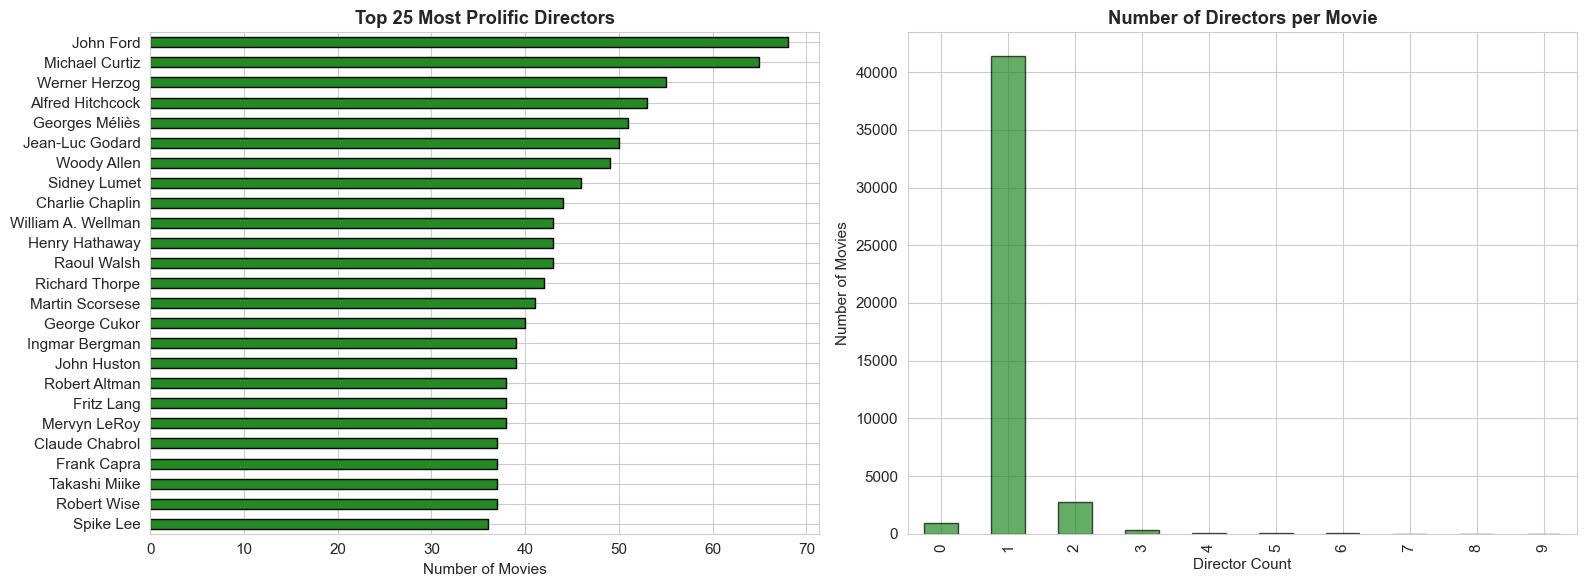

In [35]:
# 5.3  Directors analysis
all_directors = []
for crew_list in credits_df['crew_parsed']:
    for member in crew_list:
        if isinstance(member, dict) and member.get('job') == 'Director':
            all_directors.append(member.get('name', ''))

director_counts = pd.Series([d for d in all_directors if d]).value_counts()
print(f'Total director credits: {len(all_directors):,}')
print(f'Unique directors: {director_counts.shape[0]:,}')

# Directors per movie
directors_per_movie = credits_df['crew_parsed'].apply(
    lambda crew: sum(1 for m in crew if isinstance(m, dict) and m.get('job') == 'Director')
)
print(f'\nDirectors per movie: mean={directors_per_movie.mean():.2f}, max={directors_per_movie.max()}')

fig, axes = plt.subplots(1, 2, figsize=(16, 6))

# Top 25 directors
director_counts.head(25).sort_values().plot(kind='barh', ax=axes[0], color='forestgreen', edgecolor='black')
axes[0].set_title('Top 25 Most Prolific Directors', fontweight='bold')
axes[0].set_xlabel('Number of Movies')

# Directors per movie
directors_per_movie.value_counts().sort_index().head(10).plot(
    kind='bar', ax=axes[1], color='forestgreen', alpha=0.7, edgecolor='black')
axes[1].set_title('Number of Directors per Movie', fontweight='bold')
axes[1].set_xlabel('Director Count')
axes[1].set_ylabel('Number of Movies')

plt.tight_layout()
plt.show()

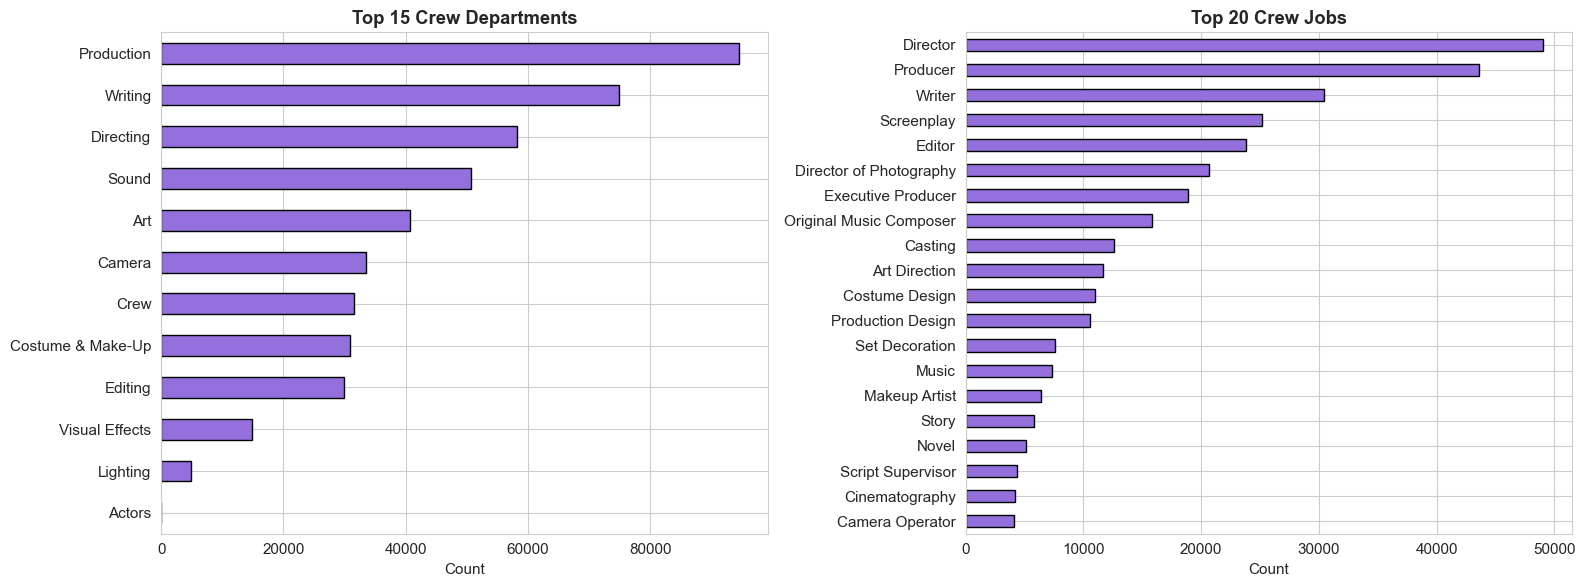

In [36]:
# 5.4  Crew department breakdown
all_departments = []
all_jobs = []
for crew_list in credits_df['crew_parsed']:
    for member in crew_list:
        if isinstance(member, dict):
            all_departments.append(member.get('department', 'Unknown'))
            all_jobs.append(member.get('job', 'Unknown'))

dept_counts = pd.Series(all_departments).value_counts()
job_counts = pd.Series(all_jobs).value_counts()

fig, axes = plt.subplots(1, 2, figsize=(16, 6))

dept_counts.head(15).sort_values().plot(kind='barh', ax=axes[0], color='mediumpurple', edgecolor='black')
axes[0].set_title('Top 15 Crew Departments', fontweight='bold')
axes[0].set_xlabel('Count')

job_counts.head(20).sort_values().plot(kind='barh', ax=axes[1], color='mediumpurple', edgecolor='black')
axes[1].set_title('Top 20 Crew Jobs', fontweight='bold')
axes[1].set_xlabel('Count')

plt.tight_layout()
plt.show()

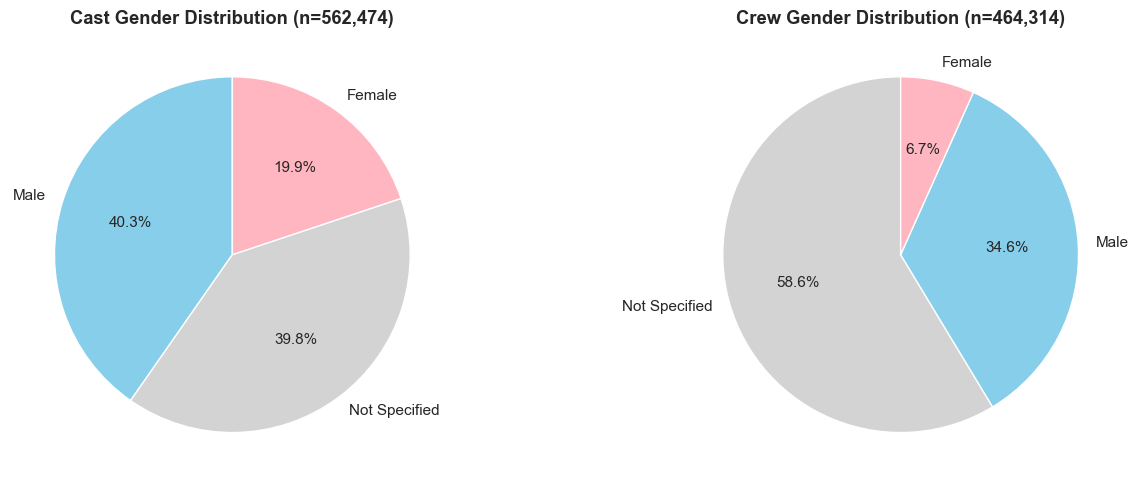

In [49]:
# 5.5  Gender distribution in cast & crew
# Gender coding: 0=not specified, 1=female, 2=male
cast_genders = []
for cast_list in credits_df['cast_parsed']:
    for member in cast_list:
        if isinstance(member, dict):
            cast_genders.append(member.get('gender', 0))

crew_genders = []
for crew_list in credits_df['crew_parsed']:
    for member in crew_list:
        if isinstance(member, dict):
            crew_genders.append(member.get('gender', 0))

gender_map = {0: 'Not Specified', 1: 'Female', 2: 'Male'}

fig, axes = plt.subplots(1, 2, figsize=(14, 5))

cast_g = pd.Series(cast_genders).map(gender_map).value_counts()
cast_g.plot(kind='pie', ax=axes[0], autopct='%1.1f%%',
            colors=['#87CEEB', '#D3D3D3', '#FFB6C1'], startangle=90)
axes[0].set_title(f'Cast Gender Distribution (n={len(cast_genders):,})', fontweight='bold')
axes[0].set_ylabel('')

crew_g = pd.Series(crew_genders).map(gender_map).value_counts()
crew_g.plot(kind='pie', ax=axes[1], autopct='%1.1f%%',
            colors=['#D3D3D3', '#87CEEB', '#FFB6C1'], startangle=90)
axes[1].set_title(f'Crew Gender Distribution (n={len(crew_genders):,})', fontweight='bold')
axes[1].set_ylabel('')

plt.tight_layout()
plt.show()

---
## 6. Keywords Dataset - Structure & Quality

In [38]:
# 6.1  Keywords overview
print('=' * 90)
print('KEYWORDS DATASET - OVERVIEW')
print('=' * 90)
print(f'Shape: {keywords_df.shape}')
print(f'\nColumn types:\n{keywords_df.dtypes}')
print(f'\nMissing values:\n{keywords_df.isnull().sum()}')
print(f'\nDuplicate IDs: {keywords_df["id"].duplicated().sum()}')
print(f'Unique IDs: {keywords_df["id"].nunique():,}')

# Parse keywords
keywords_df['keywords_parsed'] = keywords_df['keywords'].apply(parse_json_column)
kw_ok = keywords_df['keywords_parsed'].apply(lambda x: isinstance(x, list) and len(x) > 0).sum()
print(f'\nKeywords parsed successfully: {kw_ok:,} / {len(keywords_df):,} ({kw_ok/len(keywords_df)*100:.1f}%)')

# Show structure
sample_kw = keywords_df['keywords_parsed'].iloc[0]
if sample_kw:
    print(f'\nKeyword entry keys: {list(sample_kw[0].keys())}')
    print(f'Example entries: {sample_kw[:3]}')

KEYWORDS DATASET - OVERVIEW
Shape: (46419, 2)

Column types:
id          int64
keywords      str
dtype: object

Missing values:
id          0
keywords    0
dtype: int64

Duplicate IDs: 987
Unique IDs: 45,432

Keywords parsed successfully: 31,624 / 46,419 (68.1%)

Keyword entry keys: ['id', 'name']
Example entries: [{'id': 931, 'name': 'jealousy'}, {'id': 4290, 'name': 'toy'}, {'id': 5202, 'name': 'boy'}]


---
## 7. Keywords - Distributions & Visualizations

In [39]:
# 7.1  Keywords per movie analysis
keywords_df['num_keywords'] = keywords_df['keywords_parsed'].apply(len)
kw_names = keywords_df['keywords_parsed'].apply(
    lambda x: [k.get('name', '') for k in x if isinstance(k, dict)]
)
all_keywords = pd.Series([k for sublist in kw_names for k in sublist if k])

print(f'Total keyword assignments: {len(all_keywords):,}')
print(f'Unique keywords: {all_keywords.nunique():,}')
print(f'\nKeywords per movie:')
print(keywords_df['num_keywords'].describe().round(1).to_string())

# Movies with zero keywords
zero_kw = (keywords_df['num_keywords'] == 0).sum()
print(f'\nMovies with 0 keywords: {zero_kw:,} ({zero_kw/len(keywords_df)*100:.1f}%)')

Total keyword assignments: 158,680
Unique keywords: 19,956

Keywords per movie:
count    46419.0
mean         3.4
std          4.7
min          0.0
25%          0.0
50%          2.0
75%          5.0
max        149.0

Movies with 0 keywords: 14,795 (31.9%)


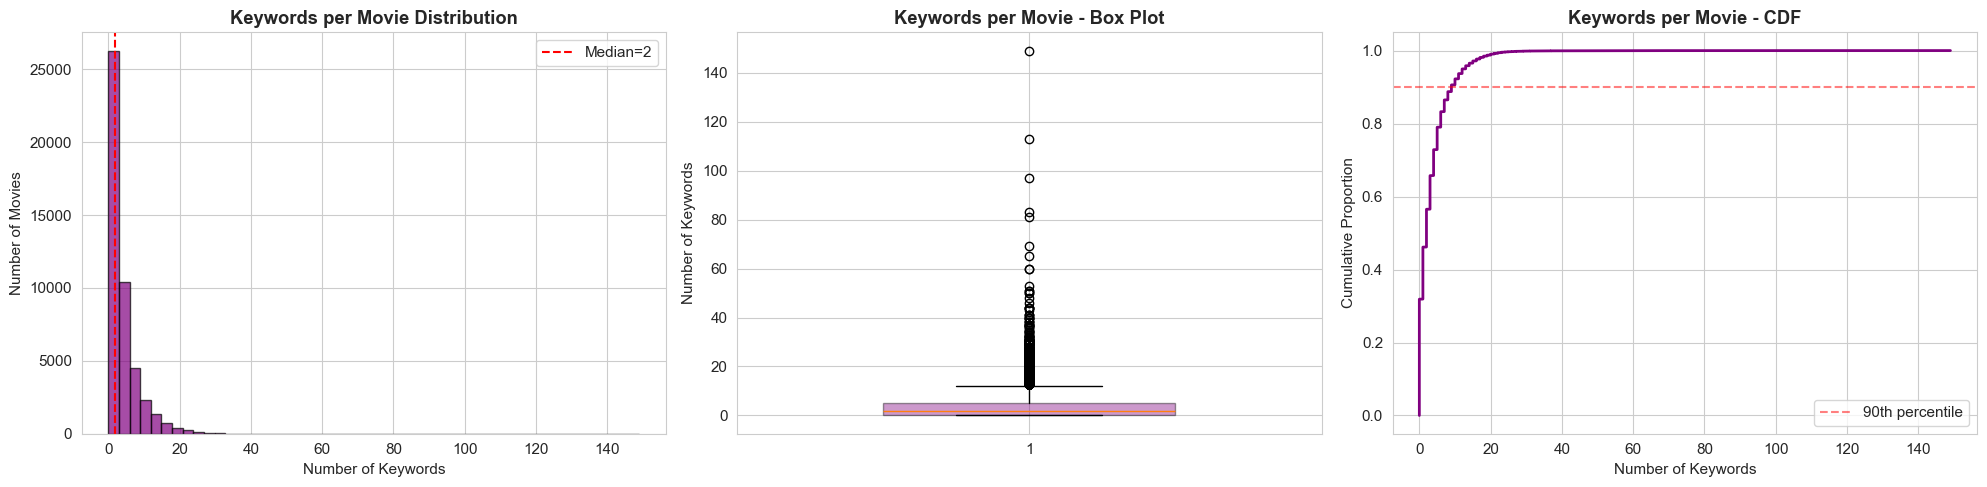

In [40]:
# 7.2  Keywords per movie distribution
fig, axes = plt.subplots(1, 3, figsize=(20, 5))

# Histogram
keywords_df['num_keywords'].hist(bins=50, ax=axes[0], color='purple', edgecolor='black', alpha=0.7)
axes[0].set_title('Keywords per Movie Distribution', fontweight='bold')
axes[0].set_xlabel('Number of Keywords')
axes[0].set_ylabel('Number of Movies')
axes[0].axvline(keywords_df['num_keywords'].median(), color='red', linestyle='--',
                label=f'Median={keywords_df["num_keywords"].median():.0f}')
axes[0].legend()

# Box plot
axes[1].boxplot(keywords_df['num_keywords'], vert=True, widths=0.5, patch_artist=True,
                boxprops=dict(facecolor='purple', alpha=0.4))
axes[1].set_title('Keywords per Movie - Box Plot', fontweight='bold')
axes[1].set_ylabel('Number of Keywords')

# CDF
sorted_kw = np.sort(keywords_df['num_keywords'])
cdf = np.arange(1, len(sorted_kw)+1) / len(sorted_kw)
axes[2].plot(sorted_kw, cdf, color='purple', linewidth=2)
axes[2].set_title('Keywords per Movie - CDF', fontweight='bold')
axes[2].set_xlabel('Number of Keywords')
axes[2].set_ylabel('Cumulative Proportion')
axes[2].axhline(0.9, color='red', linestyle='--', alpha=0.5, label='90th percentile')
axes[2].legend()

plt.tight_layout()
plt.show()

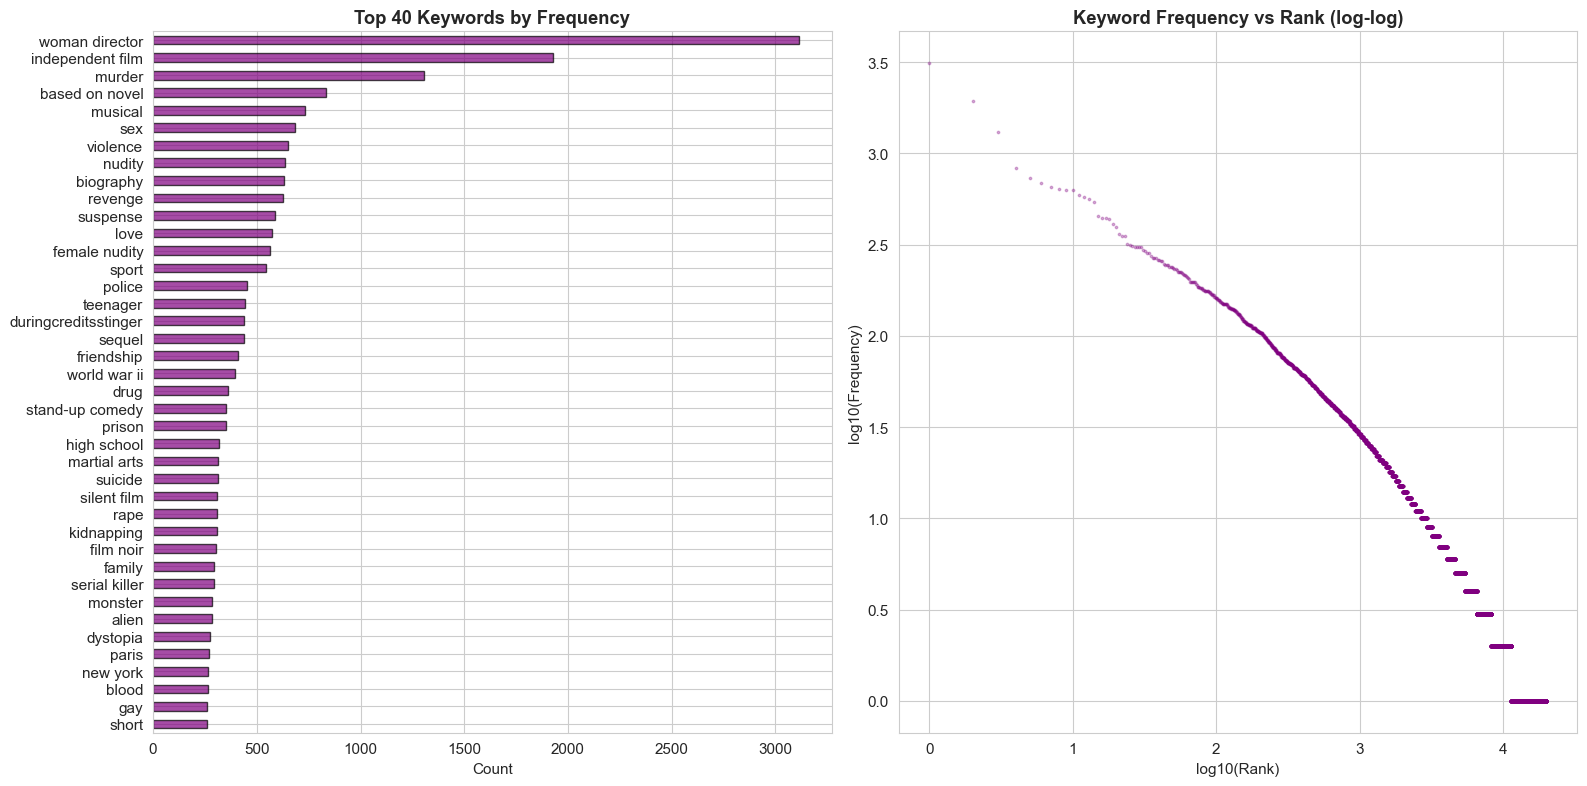

Top 10 keywords:
woman director      3115
independent film    1930
murder              1308
based on novel       835
musical              734
sex                  685
violence             651
nudity               636
biography            629
revenge              626

-> Keywords follow a power law: few very common, many appearing only once
   Keywords appearing only once: 8,559 (42.9%)
   Keywords appearing >= 10 times: 2,935
   Keywords appearing >= 50 times: 516


In [41]:
# 7.3  Top keywords & frequency analysis
top_kw = all_keywords.value_counts()

fig, axes = plt.subplots(1, 2, figsize=(16, 8))

# Top 40 keywords
top_kw.head(40).sort_values().plot(kind='barh', ax=axes[0], color='purple', edgecolor='black', alpha=0.7)
axes[0].set_title('Top 40 Keywords by Frequency', fontweight='bold')
axes[0].set_xlabel('Count')

# Keyword frequency distribution (log-log for power law check)
kw_freq = top_kw.values
ranks = np.arange(1, len(kw_freq) + 1)
axes[1].scatter(np.log10(ranks), np.log10(kw_freq), s=3, alpha=0.3, c='purple')
axes[1].set_title('Keyword Frequency vs Rank (log-log)', fontweight='bold')
axes[1].set_xlabel('log10(Rank)')
axes[1].set_ylabel('log10(Frequency)')

plt.tight_layout()
plt.show()

print('Top 10 keywords:')
print(top_kw.head(10).to_string())
print(f'\n-> Keywords follow a power law: few very common, many appearing only once')
print(f'   Keywords appearing only once: {(top_kw == 1).sum():,} ({(top_kw==1).sum()/len(top_kw)*100:.1f}%)')
print(f'   Keywords appearing >= 10 times: {(top_kw >= 10).sum():,}')
print(f'   Keywords appearing >= 50 times: {(top_kw >= 50).sum():,}')

In [42]:
# 7.4  Keyword category analysis - understand the TYPES of keywords
sample_keywords = top_kw.head(100).index.tolist()
print('Top 100 keywords (inspect what types of tags they are):')
for i in range(0, len(sample_keywords), 5):
    chunk = sample_keywords[i:i+5]
    print(f'  {", ".join(chunk)}')

print(f'\n-> Keywords include: themes, plot elements, settings, character types, moods')
print(f'   These are PRE-EXTRACTED tags - no NLP needed')
print(f'   Strategy: use keyword count + binary encoding for top-N keywords')

Top 100 keywords (inspect what types of tags they are):
  woman director, independent film, murder, based on novel, musical
  sex, violence, nudity, biography, revenge
  suspense, love, female nudity, sport, police
  teenager, duringcreditsstinger, sequel, friendship, world war ii
  drug, prison, stand-up comedy, high school, martial arts
  suicide, rape, kidnapping, silent film, film noir
  family, serial killer, monster, alien, dystopia
  paris, new york, blood, gay, short
  marriage, christmas, gore, death, zombie
  gangster, small town, london england, romance, prostitute
  detective, aftercreditsstinger, male nudity, robbery, vampire
  father son relationship, wedding, los angeles, escape, dog
  teacher, holiday, war, magic, hospital
  music, remake, doctor, jealousy, based on true story
  ghost, party, island, new york city, spy
  lgbt, daughter, japan, investigation, coming of age
  money, superhero, infidelity, brother brother relationship, corruption
  torture, homosexuality, 

---
## 8. Cross-Dataset Alignment & Join Analysis

How well do the three datasets connect via the `id` column?

In [43]:
# 8.1  ID overlap analysis
# Clean movies IDs (remove non-numeric)
movies_ids = set(movies_df[movies_df['id'].astype(str).str.match(r'^\d+$')]['id'].astype(int))
credits_ids = set(credits_df['id'])
keywords_ids = set(keywords_df['id'])

print('=' * 90)
print('CROSS-DATASET JOIN ANALYSIS')
print('=' * 90)
print(f'\nDataset sizes (unique IDs):')
print(f'  Movies   : {len(movies_ids):,}')
print(f'  Credits  : {len(credits_ids):,}')
print(f'  Keywords : {len(keywords_ids):,}')

# Pairwise overlaps
mc = movies_ids & credits_ids
mk = movies_ids & keywords_ids
ck = credits_ids & keywords_ids
mck = movies_ids & credits_ids & keywords_ids

print(f'\nOverlaps:')
print(f'  Movies  & Credits  : {len(mc):,}')
print(f'  Movies  & Keywords : {len(mk):,}')
print(f'  Credits & Keywords : {len(ck):,}')
print(f'  All three          : {len(mck):,}')

print(f'\nData loss on inner join (all three):')
print(f'  Movies lost  : {len(movies_ids) - len(mck):,} ({(len(movies_ids)-len(mck))/len(movies_ids)*100:.1f}%)')
print(f'  Credits lost : {len(credits_ids) - len(mck):,} ({(len(credits_ids)-len(mck))/len(credits_ids)*100:.1f}%)')
print(f'  Keywords lost: {len(keywords_ids) - len(mck):,} ({(len(keywords_ids)-len(mck))/len(keywords_ids)*100:.1f}%)')

CROSS-DATASET JOIN ANALYSIS

Dataset sizes (unique IDs):
  Movies   : 45,433
  Credits  : 45,432
  Keywords : 45,432

Overlaps:
  Movies  & Credits  : 45,432
  Movies  & Keywords : 45,432
  Credits & Keywords : 45,432
  All three          : 45,432

Data loss on inner join (all three):
  Movies lost  : 1 (0.0%)
  Credits lost : 0 (0.0%)
  Keywords lost: 0 (0.0%)


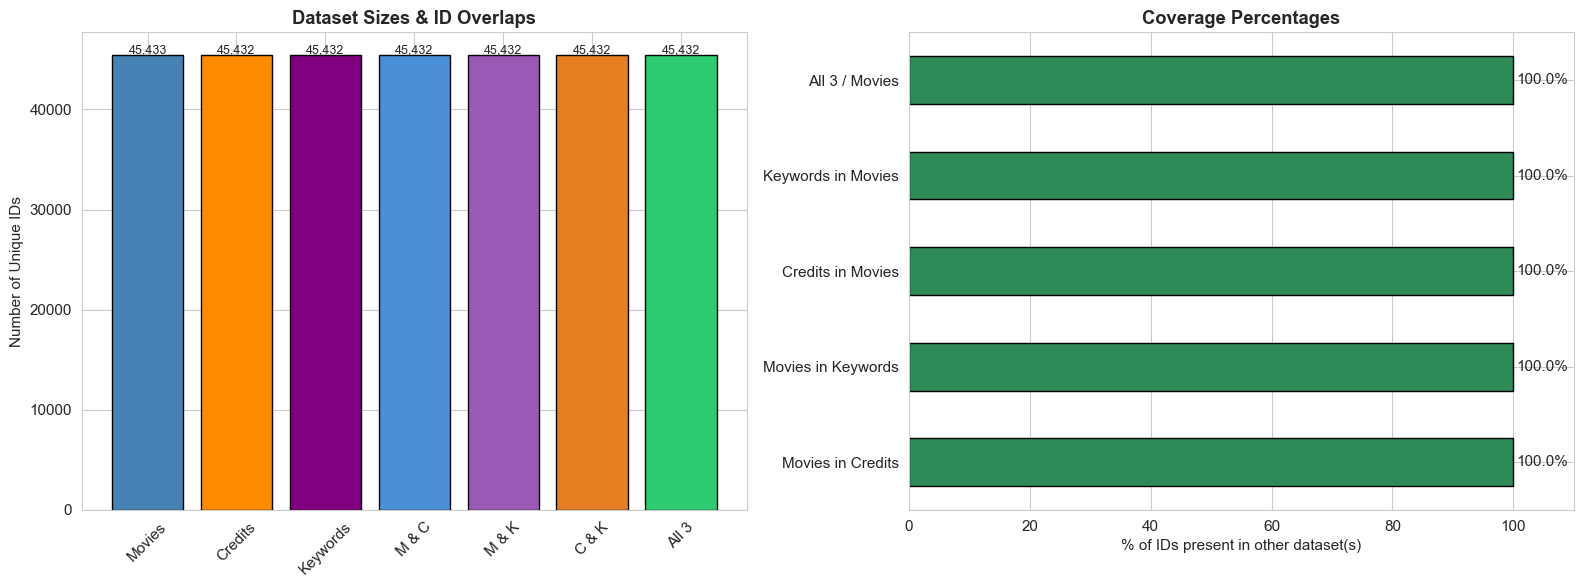

In [44]:
# 8.2  Visual overlap
fig, axes = plt.subplots(1, 2, figsize=(16, 6))

# Bar chart showing dataset sizes and overlaps
categories = ['Movies', 'Credits', 'Keywords', 'M & C', 'M & K', 'C & K', 'All 3']
values = [len(movies_ids), len(credits_ids), len(keywords_ids),
          len(mc), len(mk), len(ck), len(mck)]
colors_bar = ['steelblue', 'darkorange', 'purple', '#4A90D9', '#9B59B6', '#E67E22', '#2ECC71']

bars = axes[0].bar(categories, values, color=colors_bar, edgecolor='black')
axes[0].set_title('Dataset Sizes & ID Overlaps', fontweight='bold')
axes[0].set_ylabel('Number of Unique IDs')
for bar, val in zip(bars, values):
    axes[0].text(bar.get_x() + bar.get_width()/2, bar.get_height() + 200,
                 f'{val:,}', ha='center', fontsize=9)
axes[0].tick_params(axis='x', rotation=45)

# Coverage percentages
coverage = {
    'Movies in Credits': len(mc)/len(movies_ids)*100,
    'Movies in Keywords': len(mk)/len(movies_ids)*100,
    'Credits in Movies': len(mc)/len(credits_ids)*100,
    'Keywords in Movies': len(mk)/len(keywords_ids)*100,
    'All 3 / Movies': len(mck)/len(movies_ids)*100,
}
cov_series = pd.Series(coverage)
cov_series.plot(kind='barh', ax=axes[1], color='seagreen', edgecolor='black')
axes[1].set_title('Coverage Percentages', fontweight='bold')
axes[1].set_xlabel('% of IDs present in other dataset(s)')
for i, v in enumerate(cov_series):
    axes[1].text(v + 0.5, i, f'{v:.1f}%', va='center')
axes[1].set_xlim(0, 110)

plt.tight_layout()
plt.show()

In [45]:
# 8.3  What do we lose on join? Analyze the missing movies
movies_numeric_id = movies_df[movies_df['id'].astype(str).str.match(r'^\d+$')].copy()
movies_numeric_id['id'] = movies_numeric_id['id'].astype(int)

# Movies without credits
no_credits = movies_numeric_id[~movies_numeric_id['id'].isin(credits_ids)]
no_keywords = movies_numeric_id[~movies_numeric_id['id'].isin(keywords_ids)]

print('--- Movies WITHOUT credits data ---')
print(f'  Count: {len(no_credits):,}')
if len(no_credits) > 0:
    print(f'  Status distribution:\n{no_credits["status"].value_counts().head().to_string()}')

print(f'\n--- Movies WITHOUT keywords data ---')
print(f'  Count: {len(no_keywords):,}')
if len(no_keywords) > 0:
    print(f'  Status distribution:\n{no_keywords["status"].value_counts().head().to_string()}')

print(f'\n-> Recommendation: inner join on all three datasets retains {len(mck):,} movies')
print(f'   This is {len(mck)/len(movies_ids)*100:.1f}% of movies - minimal loss')

--- Movies WITHOUT credits data ---
  Count: 1
  Status distribution:
status
Released    1

--- Movies WITHOUT keywords data ---
  Count: 1
  Status distribution:
status
Released    1

-> Recommendation: inner join on all three datasets retains 45,432 movies
   This is 100.0% of movies - minimal loss


---
## 9. Key Findings & Implications for Feature Engineering

### Movies Metadata
| Finding | Implication |
|---|---|
| `budget` stored as string, some non-numeric | Need type conversion, drop corrupted rows |
| ~90% of `belongs_to_collection` missing | Consider binary flag (belongs to collection or not) |
| `homepage`, `tagline` mostly missing | Drop or use as binary availability flags |
| Budget/revenue heavily right-skewed | Log-transform for modeling |
| Strong correlation: budget <-> revenue, vote_count <-> revenue | Good predictive features |
| ~83% of movies have zero budget/revenue | Filter to movies with financial data for prediction |
| Genre, company, country are JSON lists | Parse -> count features + binary encoding |

### Credits
| Finding | Implication |
|---|---|
| Cast/crew are JSON with rich fields | Extract: director name, top-N actors, cast size, crew size |
| Gender data available | Can create gender ratio features |
| Department/job breakdown | Key roles: Director, Producer, Screenplay -> binary features |
| Cast size varies widely (0-400+) | Useful numeric feature, consider log transform |

### Keywords
| Finding | Implication |
|---|---|
| Pre-extracted tags, NOT free text | **No NLP needed** |
| ~20K unique keywords, power-law distribution | Binary encode top 50-100 keywords |
| Most keywords appear only once | Filter by frequency threshold >= 10 |
| Keywords per movie: median ~4 | `num_keywords` as numeric feature |

### Cross-Dataset
| Finding | Implication |
|---|---|
| Inner join retains ~98%+ of movies | Safe to inner-join all three on `id` |
| 3 corrupted rows in movies (non-numeric id) | Drop before merge |

### Pipeline Plan
1. **Notebook 02 (Preprocessing):** Clean types, handle missing values, remove corrupted rows, filter, merge all 3 datasets
2. **Notebook 03 (Feature Engineering):** Create all derived features from the three merged datasets
3. **Notebook 04 (Prepare for Modeling):** Final feature selection, encoding, scaling, train/test split